In [16]:
import os
import json
import numpy as np
import matplotlib.pyplot as plt

np.set_printoptions(precision=3)

samples like: 8 + 6 * 3 / 2 - 4 * 7 * 4 / 5 - 1 / 5 / 4 * 9 / 9 + 1 + 8 * 4 - 7 * 9 * 9 + 3 / 4 + 7 / 9 - 6 / 6 * 4 + 3 / 3	1 5 1 2 3 4 6 7 1 2 3 4 5 6 8 9 1 2 3 4 5 6 7 8 10 11 12 13 1 2 14 15 1 2 3 4 16 17 1 2 18 19 1 2 20 21 1 2 3 4 22 23 1 2	23	2

In [17]:
seq = '8 + 6 * 3 / 2 - 4 * 7 * 4 / 5 - 1 / 5 / 4 * 9 / 9 + 1 + 8 * 4 - 7 * 9 * 9 + 3 / 4 + 7 / 9 - 6 / 6 * 4 + 3 / 3'.split(' ')
seq_len = len(seq)
seq_len

55

In [18]:
ds = '1 5 1 2 3 4 6 7 1 2 3 4 5 6 8 9 1 2 3 4 5 6 7 8 10 11 12 13 1 2 14 15 1 2 3 4 16 17 1 2 18 19 1 2 20 21 1 2 3 4 22 23 1 2'.split(' ')
syn_dis = [int(d) for d in ds]

In [19]:
prob_action = {i:[] for i in range(seq_len)}
mem = {i:[] for i in range(seq_len)}

In [20]:
i = 0
nc = 0
nt = 0
with open('feval-analy_d23_ne10-sarnn.txt', 'r') as f:
    for line in f:
        line_json = json.loads(line)
        if line_json['type'] != 'actions':
            assert line_json['type'] == 'input'
            nc += line_json['is_correct']
            nt += 1
            continue 
        
        prob_action[i].append(line_json['all'])
        mem[i].append(line_json['mem'])        
        i += 1
        i %= seq_len

In [24]:
np.array(mem[0]).shape

(500, 5, 100)

In [6]:
print('correct prediction%:', nc/nt)

correct prediction%: 0.992


In [7]:
remain = 3
step = []
for i in range(seq_len):
    step.append(np.array(mem[i]))
mean_mem_dist = []
for i in range(seq_len):
    mean_mem_dist.append((step[i].sum(0)/step[i].shape[0])[:, :remain])

In [8]:
for i in range(seq_len):
    mean_mem_dist[i] = np.hstack([mean_mem_dist[i], np.ones((5, 1))])
mem_whole = np.hstack(mean_mem_dist)
mem_whole.shape

(5, 220)

In [15]:
mem_whole[:, :36]

array([[ 4.163e-01,  2.553e-01,  1.591e-01,  1.000e+00,  4.336e-11,
         3.617e-11, -2.524e-12,  1.000e+00,  4.176e-01,  1.864e-01,
        -7.763e-03,  1.000e+00, -1.691e-01,  1.801e-01,  4.531e-02,
         1.000e+00,  3.617e-01,  2.207e-01, -1.843e-02,  1.000e+00,
        -1.019e-01,  1.444e-01,  4.815e-03,  1.000e+00,  4.375e-01,
         1.912e-01, -2.477e-02,  1.000e+00,  1.429e-04,  1.355e-04,
         2.586e-04,  1.000e+00,  3.782e-01,  8.716e-02, -1.448e-01,
         1.000e+00],
       [ 0.000e+00,  0.000e+00,  0.000e+00,  1.000e+00,  1.085e-11,
         3.414e-12,  4.008e-12,  1.000e+00,  1.558e-11,  1.136e-11,
        -7.039e-13,  1.000e+00,  2.032e-01,  8.535e-02,  1.488e-03,
         1.000e+00,  5.531e-02,  1.641e-02, -7.383e-03,  1.000e+00,
         1.887e-01,  1.422e-01, -5.329e-02,  1.000e+00,  8.189e-02,
         6.090e-02, -5.226e-03,  1.000e+00, -6.177e-07,  1.055e-06,
         4.112e-06,  1.000e+00,  3.301e-06, -3.671e-07,  7.963e-06,
         1.000e+00],
      

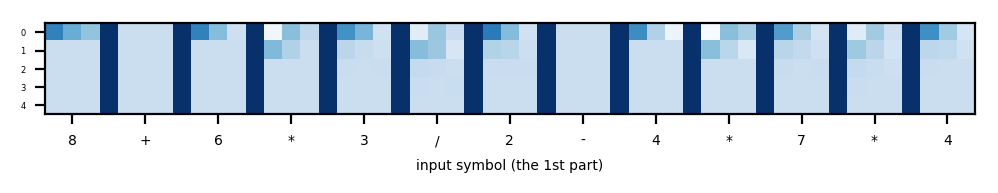

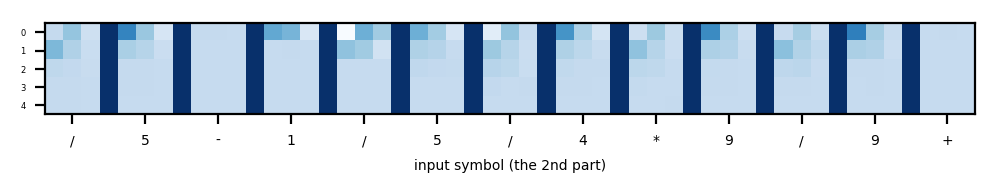

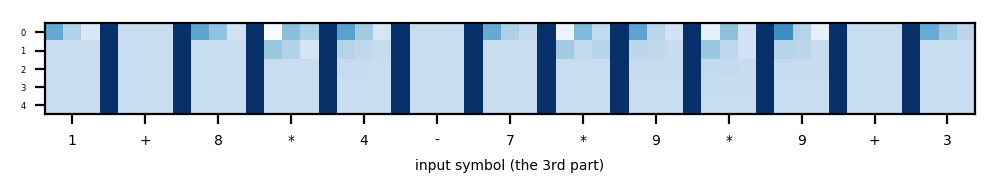

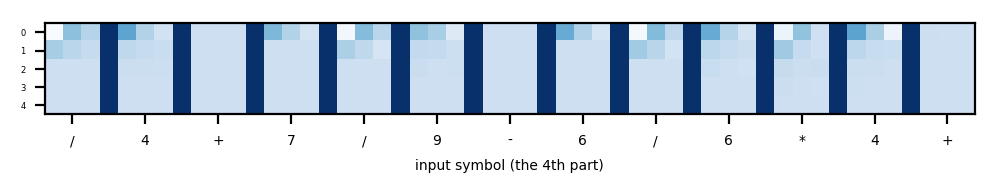

In [9]:
ncols = mem_whole.shape[1]
step_img = seq_len // 4 * (remain+1)
step_txt = seq_len // 4

for i in range(4):
    fig, ax = plt.subplots()
    fig.dpi = 200
    start_img = i * step_img
    end_img = (i+1) * step_img
    start_txt = i * step_txt
    end_txt = (i+1) * step_txt
    mem = mem_whole[:, start_img:end_img-1]
    plt.imshow(mem, cmap=plt.cm.Blues, vmax=0.7)
#     print(start_txt, end_txt)
#     print(np.arange(1, end_img-start_img+1, 4), list(seq)[start_txt:end_txt])
    plt.xticks(np.arange(1, end_img-start_img+1, 4), list(seq)[start_txt:end_txt], fontsize=5)
    plt.yticks(np.arange(5), fontsize=3)
    if i == 0:
        xlbl_str = 'input symbol (the 1st part)'
    elif i == 1:
        xlbl_str = 'input symbol (the 2nd part)'
    elif i == 2:
        xlbl_str = 'input symbol (the 3rd part)'
    else:
        xlbl_str = 'input symbol (the 4th part)'
        
    plt.xlabel(xlbl_str, fontsize=5)
    plt.ylabel('')
    plt.show()

l/r : fraction of gates that are left/right saturated

In [10]:
in_l = {i:0 for i in range(seq_len)} 
in_r = {i:0 for i in range(seq_len)}
forget_l = {i:0 for i in range(seq_len)}
forget_r = {i:0 for i in range(seq_len)}
out_l = {i:0 for i in range(seq_len)}
out_r = {i:0 for i in range(seq_len)}
ngates = 0
hdim = 100

In [11]:
i = 0
with open('feval-analy_d23_ne10-sarnn_lstm.txt', 'r') as f:
    for line in f:
        line_json = json.loads(line)
        t = line_json['t']
        ngates += 100
        for in_gate in line_json['i']:
            if in_gate > 0.9:
                in_r[t] += 1
            elif in_gate < 0.1:
                in_l[t] += 1
        
        for f_gate in line_json['f']:
            if f_gate > 0.9:
                forget_r[t] += 1
            elif f_gate < 0.1:
                forget_l[t] += 1
        
        for o_gate in line_json['o']:
            if o_gate > 0.9:
                out_r[t] += 1
            elif o_gate < 0.1:
                out_l[t] += 1

In [12]:
ngates = ngates/seq_len

In [13]:
ngates

50000.0

In [14]:
step = []
for i in range(seq_len):
    step.append(np.array(prob_action[i]))

In [15]:
mean_dist = []
for i in range(seq_len):
    mean_dist.append(step[i].sum(0)/step[i].shape[0])

in_l: 0.3995
in_r: 0.2307
forget_l: 0.44922
forget_r: 0.1689
out_l: 0.44434
out_r: 0.17554
['8']


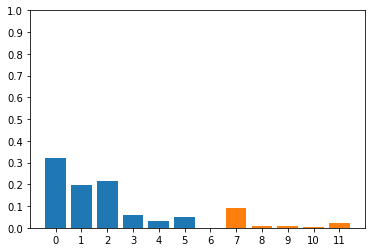

In [16]:
plt.bar(np.arange(6), mean_dist[0][:6])
plt.bar(np.arange(6, 12), mean_dist[0][6:])
yticks = plt.yticks(np.arange(0, 1.1, 0.1))
xticks = plt.xticks(np.arange(0, 12, 1))
print('in_l:', in_l[0]/ngates)
print('in_r:', in_r[0]/ngates)
print('forget_l:', forget_l[0]/ngates)
print('forget_r:', forget_r[0]/ngates)
print('out_l:', out_l[0]/ngates)
print('out_r:', out_r[0]/ngates)
print(seq[:0+1])

in_l: 0.3886
in_r: 0.52572
forget_l: 0.86444
forget_r: 0.06412
out_l: 0.41114
out_r: 0.46794
['8', '+']


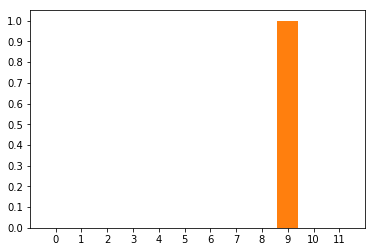

In [17]:
plt.bar(np.arange(6), mean_dist[1][:6])
plt.bar(np.arange(6, 12), mean_dist[1][6:])
yticks = plt.yticks(np.arange(0, 1.1, 0.1))
xticks = plt.xticks(np.arange(0, 12, 1))
print('in_l:', in_l[1]/ngates)
print('in_r:', in_r[1]/ngates)
print('forget_l:', forget_l[1]/ngates)
print('forget_r:', forget_r[1]/ngates)
print('out_l:', out_l[1]/ngates)
print('out_r:', out_r[1]/ngates)
print(seq[:1+1])

in_l: 0.39158
in_r: 0.29776
forget_l: 0.59466
forget_r: 0.1692
out_l: 0.54088
out_r: 0.16702
['8', '+', '6']


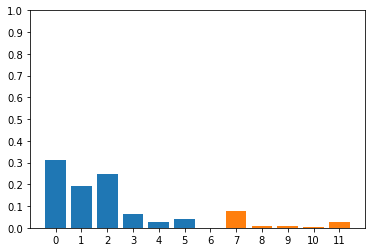

In [18]:
plt.bar(np.arange(6), mean_dist[2][:6])
plt.bar(np.arange(6, 12), mean_dist[2][6:])
yticks = plt.yticks(np.arange(0, 1.1, 0.1))
xticks = plt.xticks(np.arange(0, 12, 1))
print('in_l:', in_l[2]/ngates)
print('in_r:', in_r[2]/ngates)
print('forget_l:', forget_l[2]/ngates)
print('forget_r:', forget_r[2]/ngates)
print('out_l:', out_l[2]/ngates)
print('out_r:', out_r[2]/ngates)
print(seq[:2+1])

in_l: 0.63172
in_r: 0.27144
forget_l: 0.4909
forget_r: 0.37048
out_l: 0.53314
out_r: 0.33982
['8', '+', '6', '*']


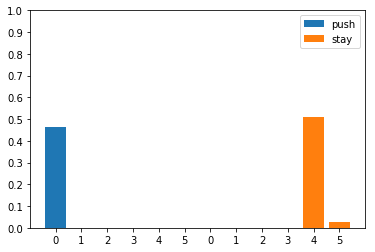

In [19]:
plt.bar(np.arange(6), mean_dist[3][:6], label='push')
plt.bar(np.arange(6, 12), mean_dist[3][6:], label='stay')
plt.legend()
yticks = plt.yticks(np.arange(0, 1.1, 0.1))
xticks = plt.xticks(np.arange(0, 12, 1), [str(i) for i in range(6)] + [str(i) for i in range(6)])
print('in_l:', in_l[3]/ngates)
print('in_r:', in_r[3]/ngates)
print('forget_l:', forget_l[3]/ngates)
print('forget_r:', forget_r[3]/ngates)
print('out_l:', out_l[3]/ngates)
print('out_r:', out_r[3]/ngates)
print(seq[:3+1])

in_l: 0.63172
in_r: 0.27144
forget_l: 0.4909
forget_r: 0.37048
out_l: 0.53314
out_r: 0.33982
['8', '+', '6', '*']


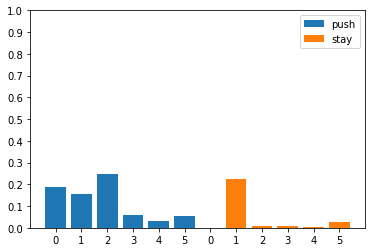

In [20]:
plt.bar(np.arange(6), mean_dist[4][:6], label='push')
plt.bar(np.arange(6, 12), mean_dist[4][6:], label='stay')
plt.legend()
yticks = plt.yticks(np.arange(0, 1.1, 0.1))
xticks = plt.xticks(np.arange(0, 12, 1), [str(i) for i in range(6)] + [str(i) for i in range(6)])
print('in_l:', in_l[3]/ngates)
print('in_r:', in_r[3]/ngates)
print('forget_l:', forget_l[3]/ngates)
print('forget_r:', forget_r[3]/ngates)
print('out_l:', out_l[3]/ngates)
print('out_r:', out_r[3]/ngates)
print(seq[:3+1])

In [21]:
# push = [mean_dist[t][6:].sum() for t in range(seq_len)]
push = [mean_dist[t][:6].sum() for t in range(seq_len)]

In [22]:
npop = []
for t in range(seq_len):
    pop = (mean_dist[t][:6] * np.arange(6)).sum() + \
        (mean_dist[t][6:] * np.arange(6)).sum()
    npop.append(pop)    

In [27]:
pop_normalized = np.array(npop) / 6

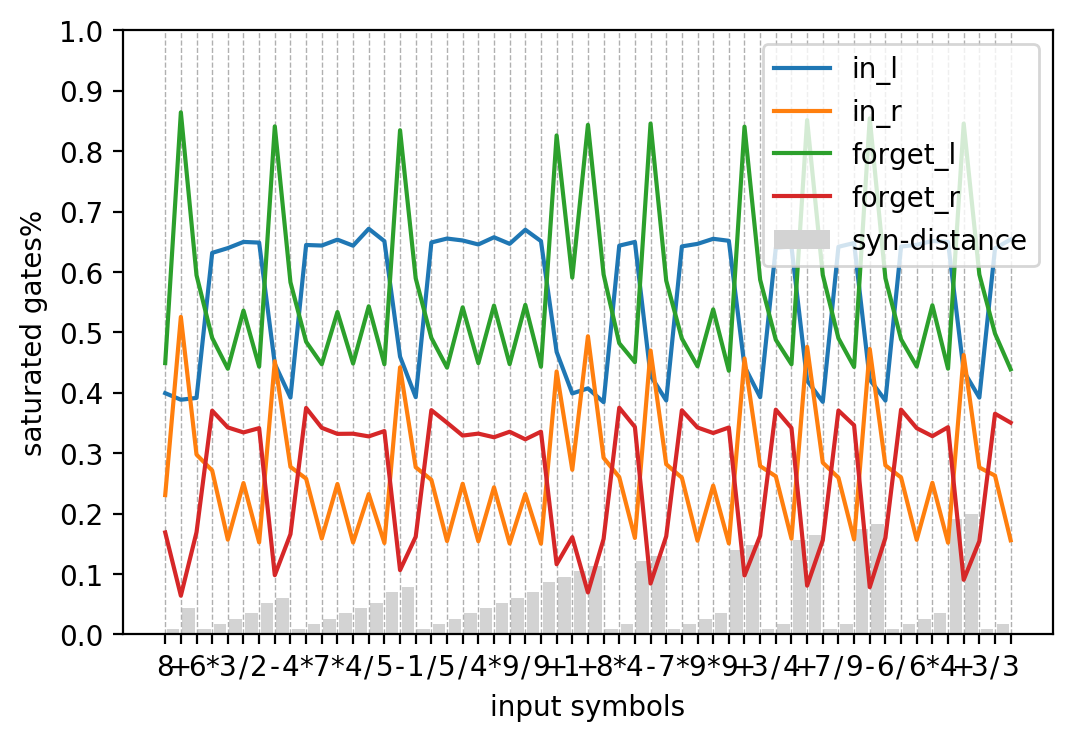

In [171]:
fig, ax = plt.subplots()
fig.dpi = 200
plt.grid(axis='x', linestyle='dashed', linewidth=0.5)
plt.plot(np.arange(seq_len), 
         np.array([in_l[i] for i in in_l.keys()])/ngates,
        label='in_l')
plt.plot(np.arange(seq_len), 
         np.array([in_r[i] for i in in_r.keys()])/ngates,
        label='in_r')
plt.plot(np.arange(seq_len), 
         np.array([forget_l[i] for i in forget_l.keys()])/ngates,
        label='forget_l')
plt.plot(np.arange(seq_len), 
         np.array([forget_r[i] for i in forget_r.keys()])/ngates,
        label='forget_r')

plt.bar(np.arange(0.5, seq_len-0.5), np.array(syn_dis)/max(syn_dis) * 0.2,
        label='syn-distance', color='lightgray')

plt.ylabel('saturated gates%')
plt.xlabel('input symbols')

plt.legend()
plt.xticks(np.arange(0, seq_len, 1), list(seq))
plt.yticks(np.arange(0, 1.1, 0.1))
plt.show()

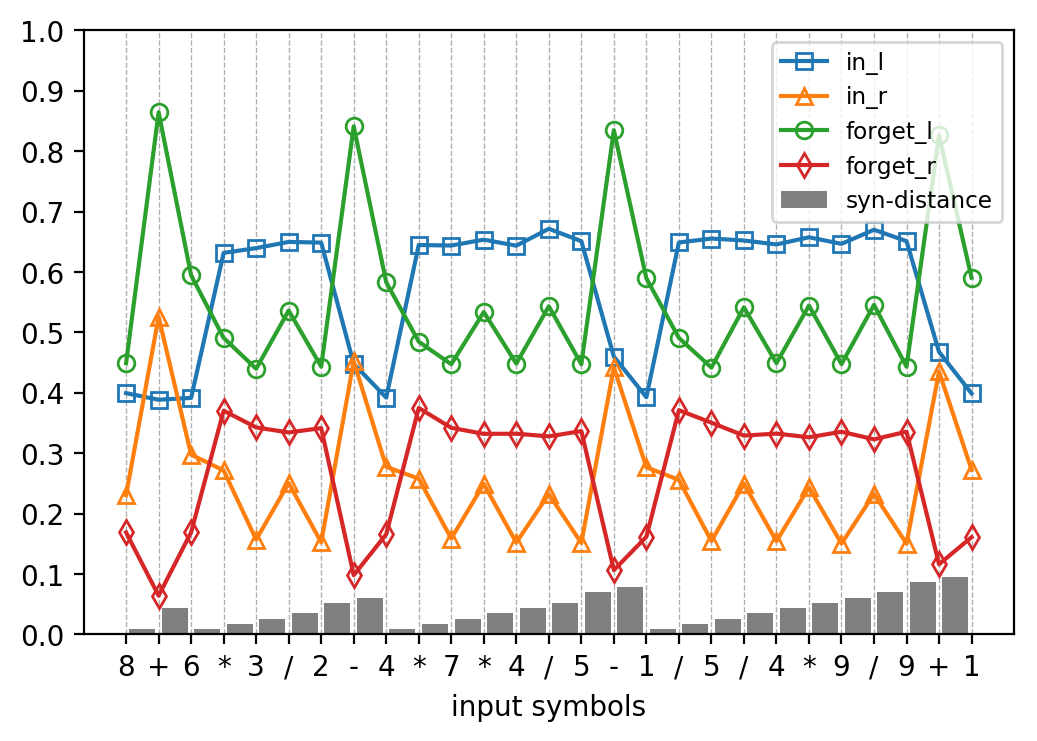

In [175]:
fig, ax = plt.subplots()
kept=seq_len//2
fig.dpi = 200
plt.grid(axis='x', linestyle='dashed', linewidth=0.5)
plt.plot(np.arange(seq_len)[:kept], 
         (np.array([in_l[i] for i in in_l.keys()])/ngates)[:kept],
        label='in_l', marker='s', fillstyle='none')
plt.plot(np.arange(seq_len)[:kept], 
         (np.array([in_r[i] for i in in_r.keys()])/ngates)[:kept],
        label='in_r', marker='^', fillstyle='none')
plt.plot(np.arange(seq_len)[:kept], 
         (np.array([forget_l[i] for i in forget_l.keys()])/ngates)[:kept],
        label='forget_l', marker='o', fillstyle='none')
plt.plot(np.arange(seq_len)[:kept], 
         (np.array([forget_r[i] for i in forget_r.keys()])/ngates)[:kept],
        label='forget_r', marker='d', fillstyle='none')

plt.bar(np.arange(0.5, seq_len-0.5)[:kept-1], (np.array(syn_dis)/max(syn_dis) * 0.2)[:kept-1],
        label='syn-distance', color='gray')

# plt.ylabel('saturated gates%')
plt.xlabel('input symbols')

plt.legend(fontsize='small')
plt.xticks(np.arange(0, seq_len, 1)[:kept], list(seq)[:kept])
plt.yticks(np.arange(0, 1.1, 0.1))
plt.show()

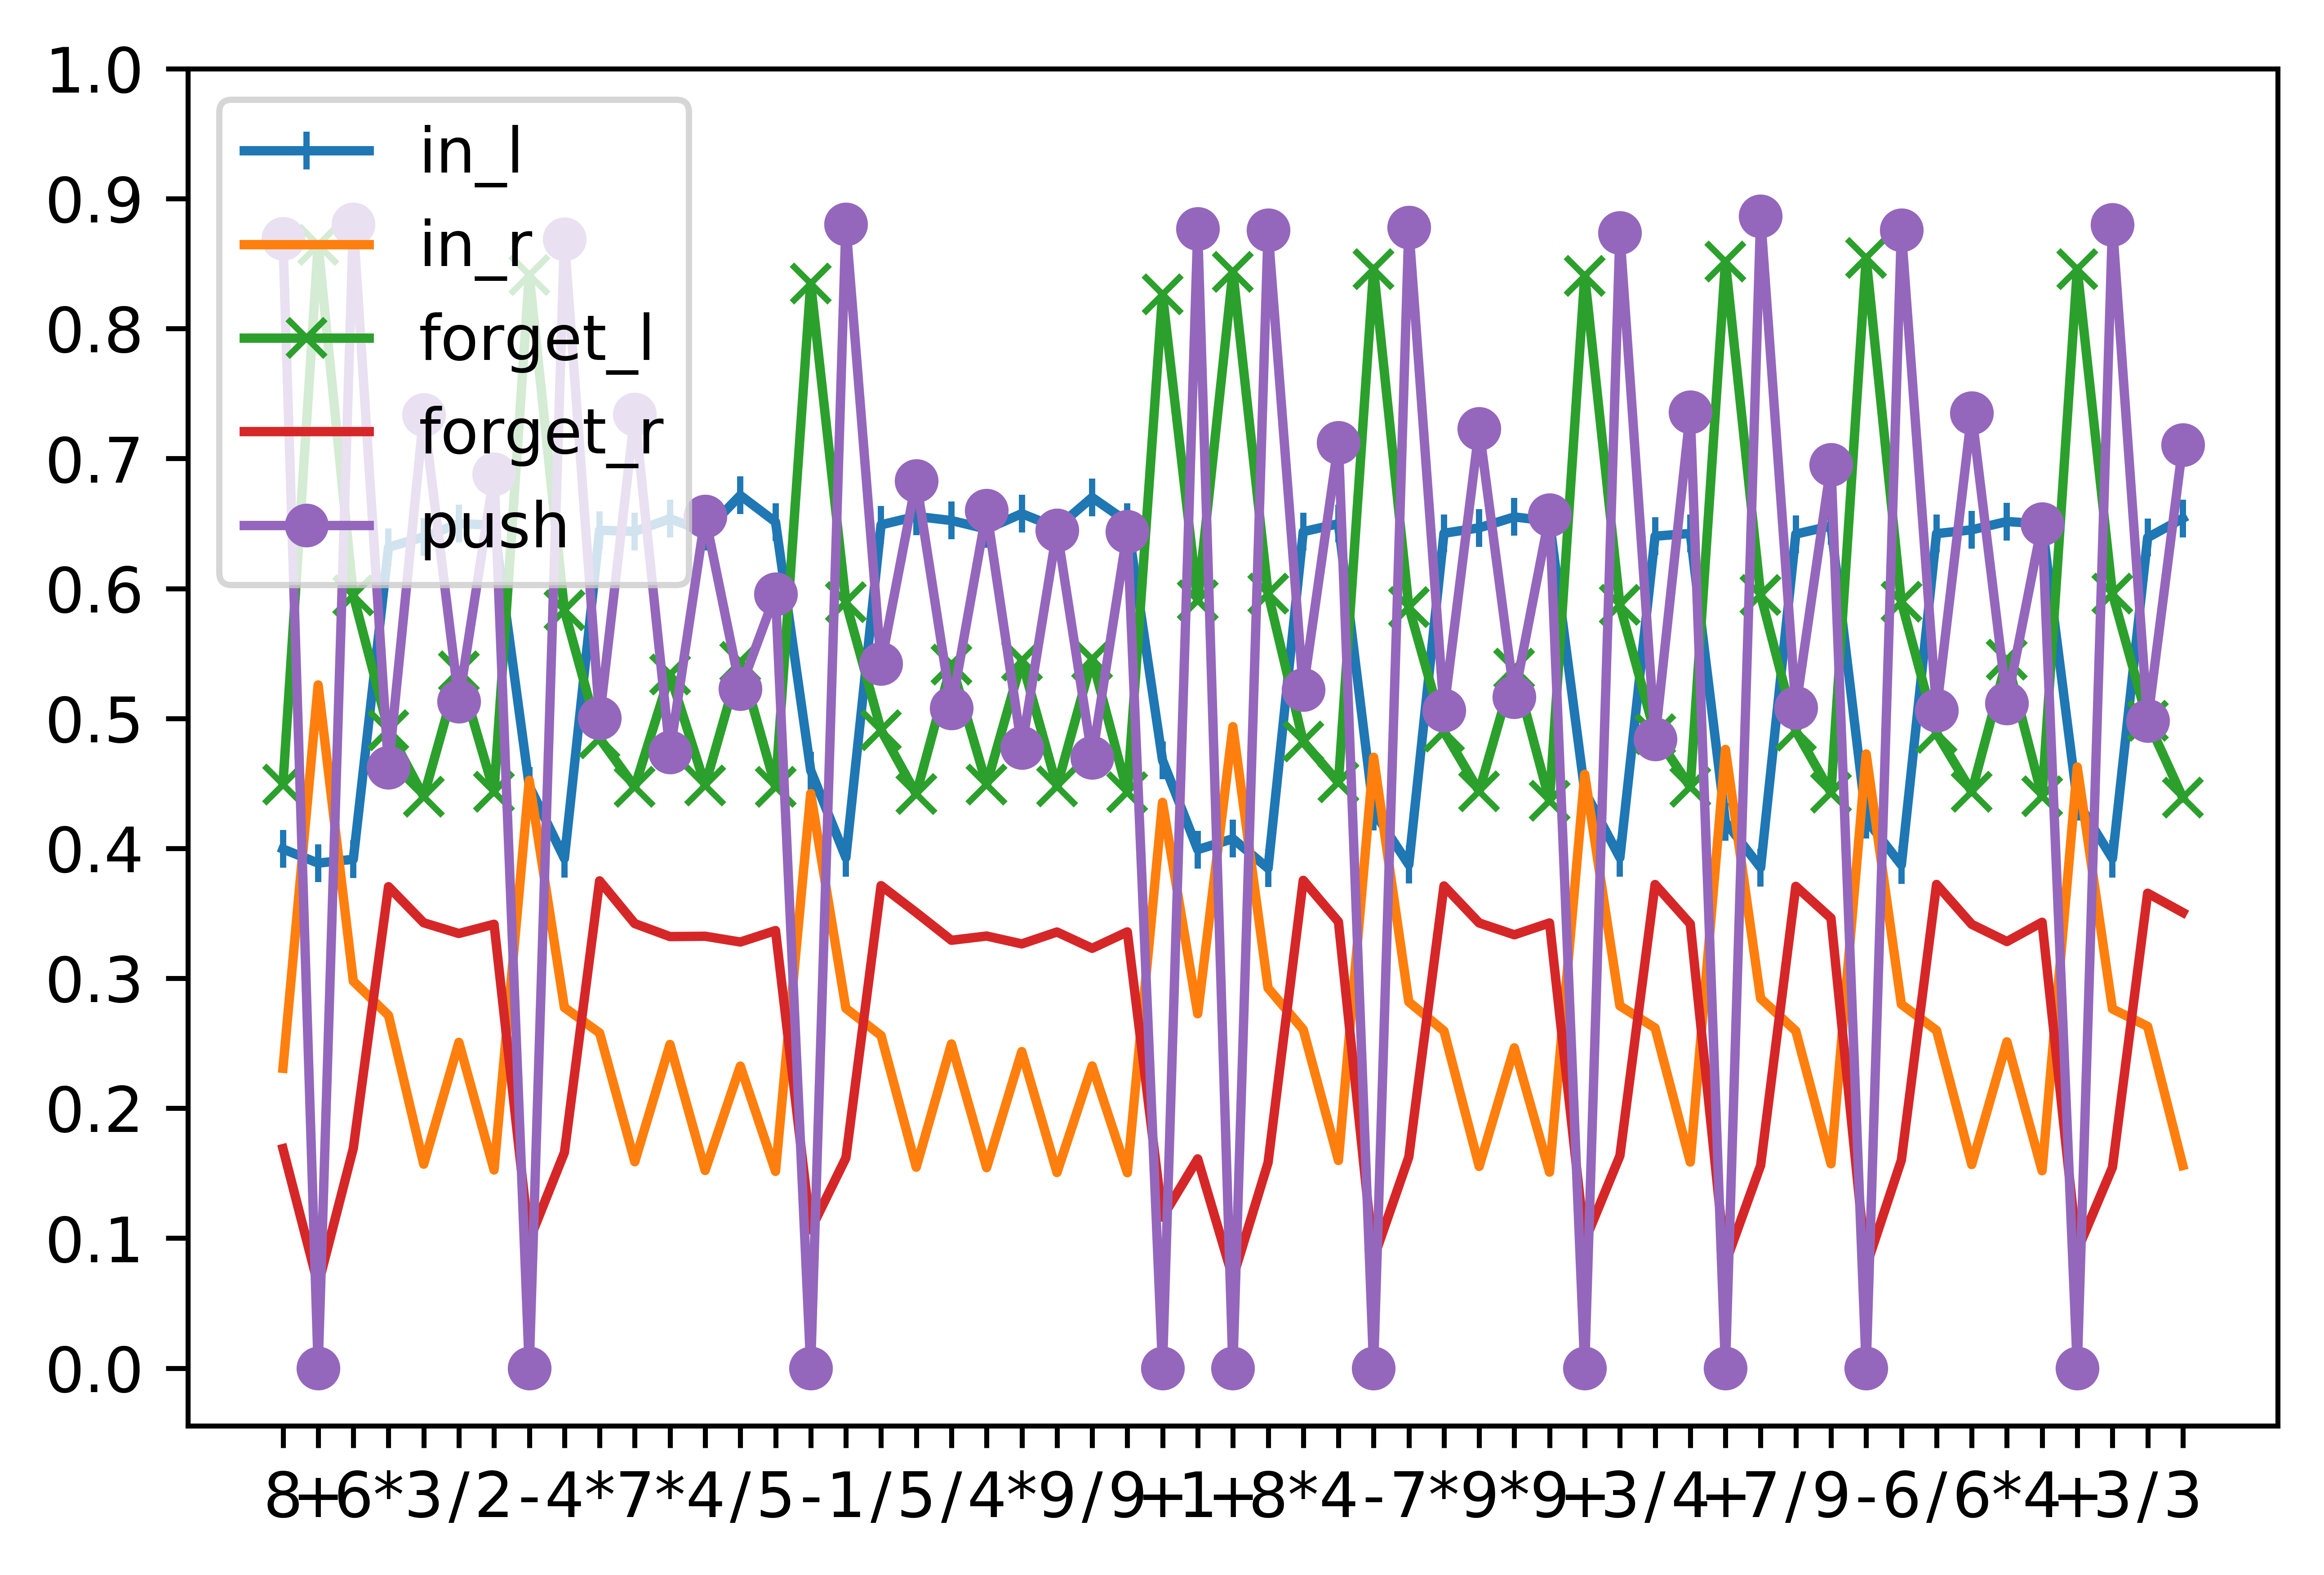

In [145]:
fig, ax = plt.subplots()
fig.dpi = 1000
plt.plot(np.arange(seq_len), 
         np.array([in_l[i] for i in in_l.keys()])/ngates,
        label='in_l', marker='|')
plt.plot(np.arange(seq_len), 
         np.array([in_r[i] for i in in_r.keys()])/ngates,
        label='in_r')
plt.plot(np.arange(seq_len), 
         np.array([forget_l[i] for i in forget_l.keys()])/ngates,
        label='forget_l',marker='x')
plt.plot(np.arange(seq_len), 
         np.array([forget_r[i] for i in forget_r.keys()])/ngates,
        label='forget_r')
plt.plot(np.arange(seq_len), 
         push,
        label='push',marker='o')

plt.legend()
plt.xticks(np.arange(0, seq_len, 1), list(seq))
plt.yticks(np.arange(0, 1.1, 0.1))
plt.show()

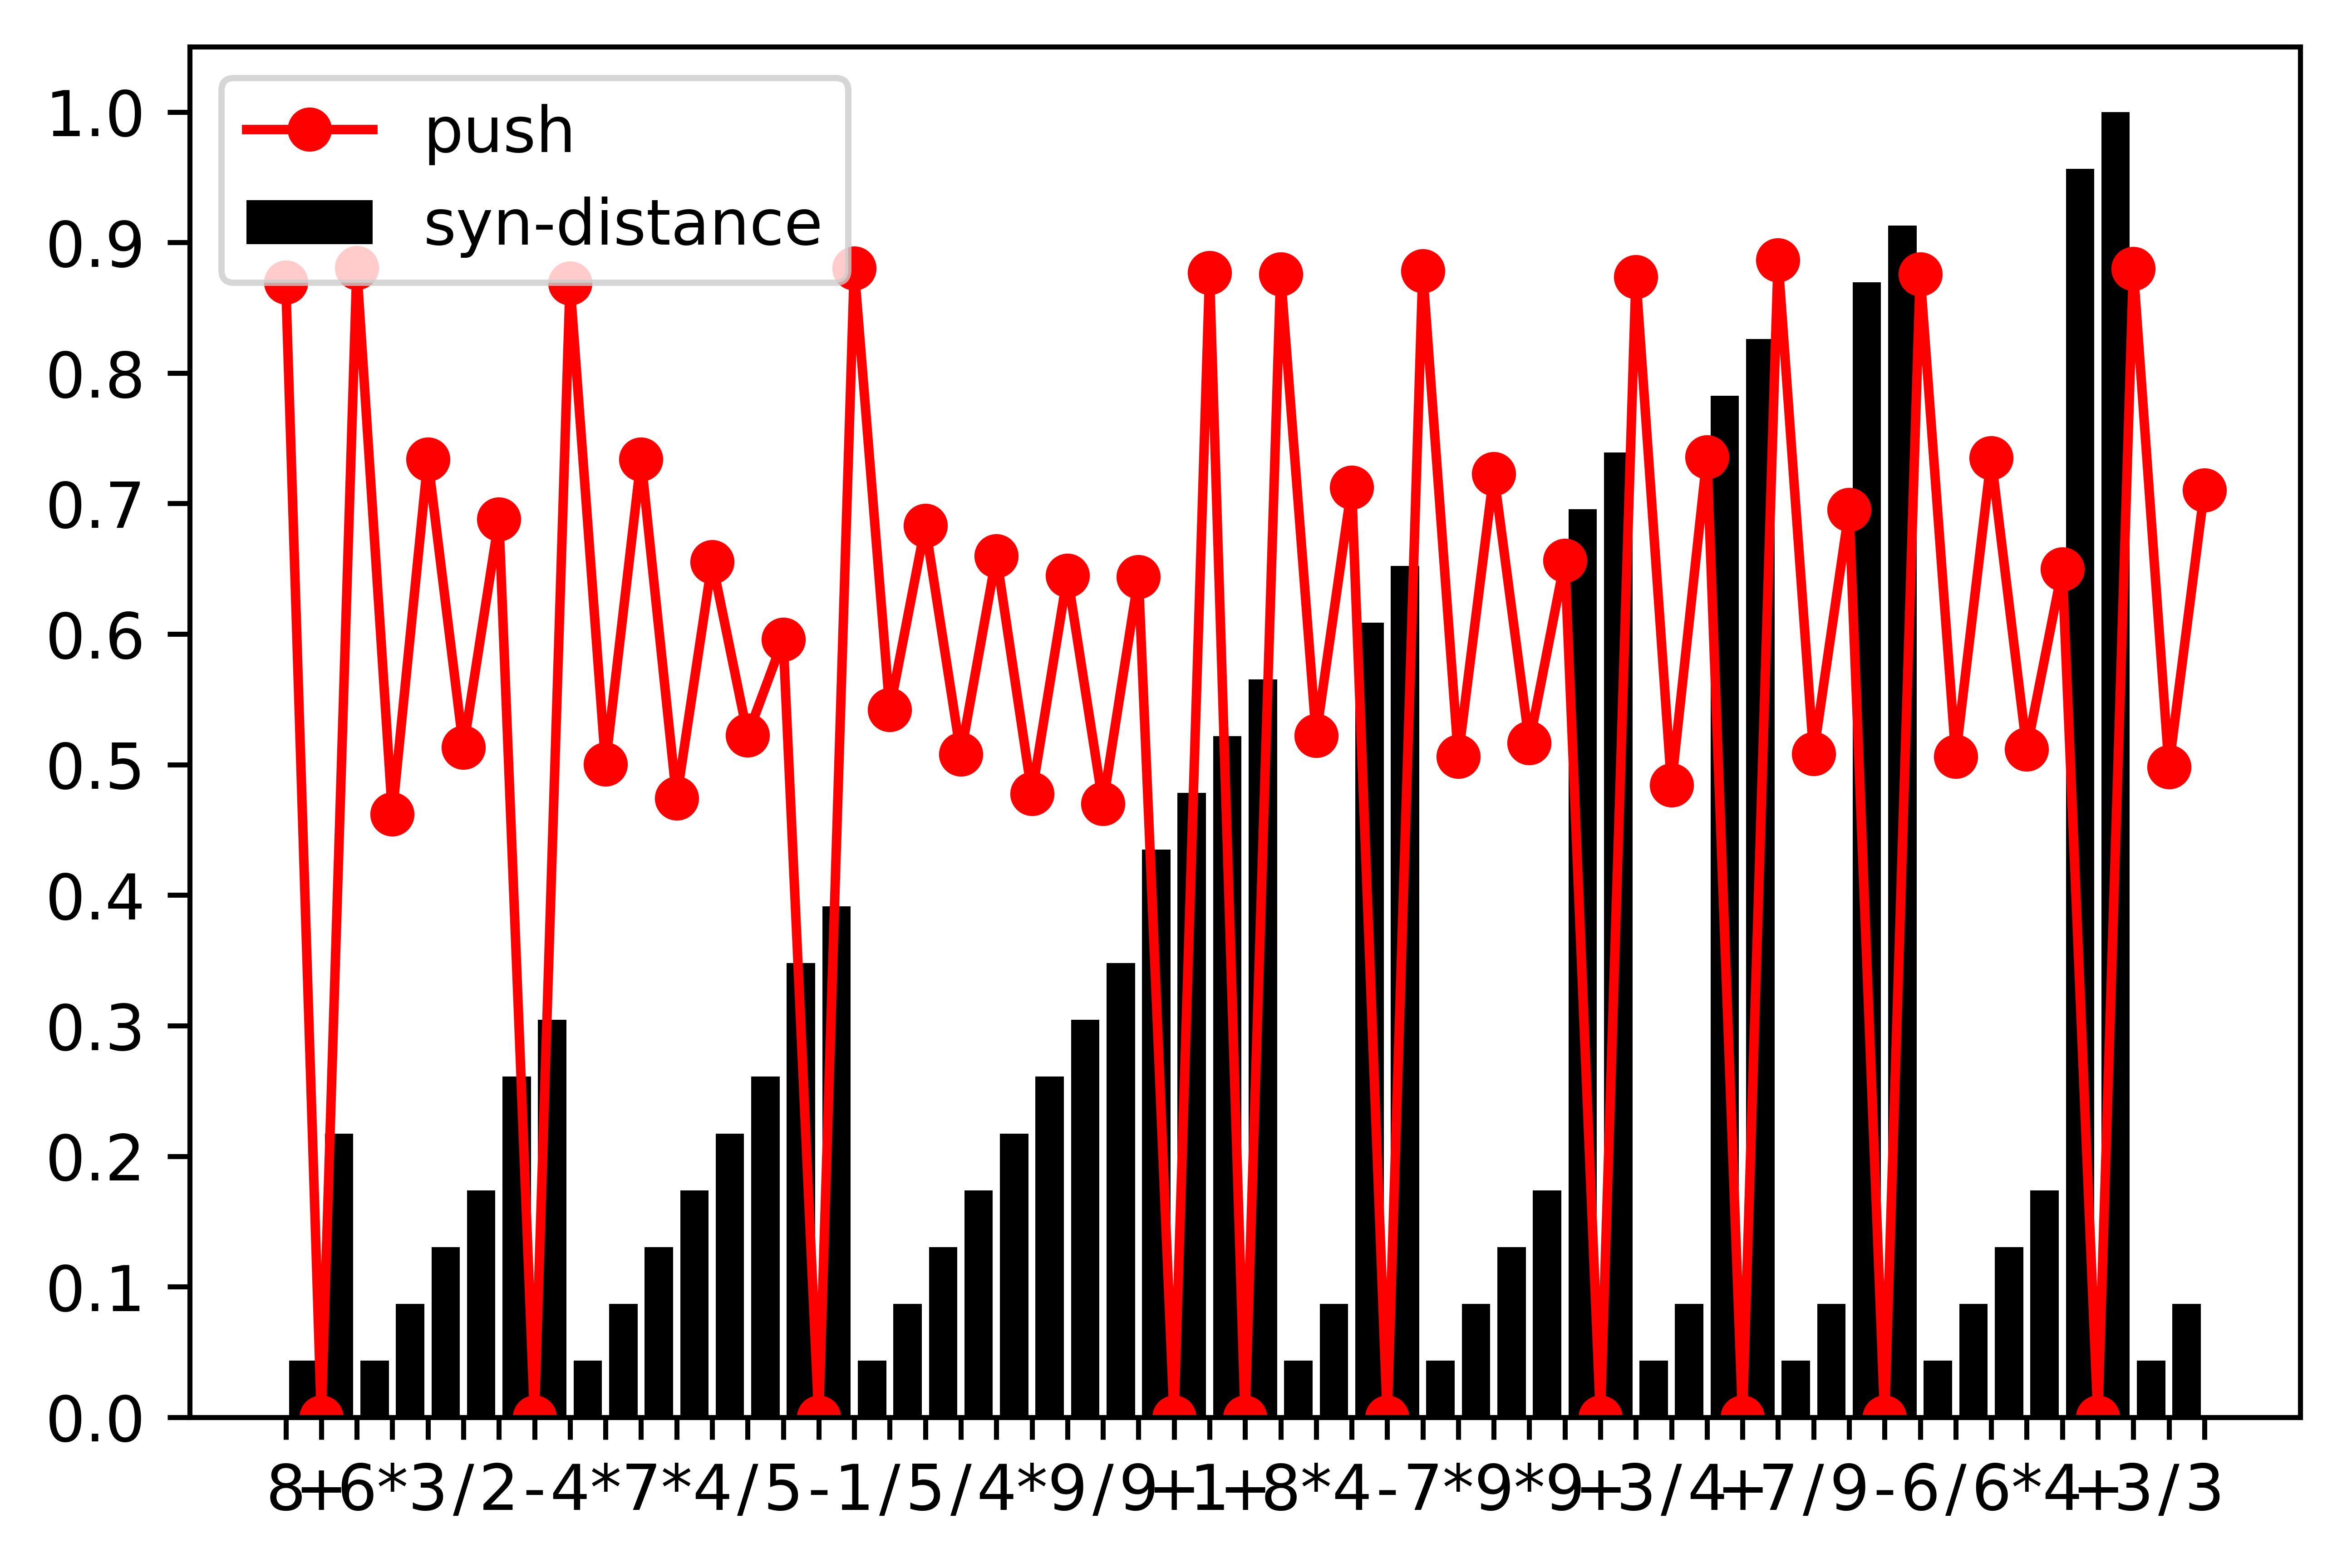

In [146]:
fig, ax = plt.subplots()
fig.dpi = 1000
plt.plot(np.arange(seq_len), 
         push,
        label='push',marker='o', color='red')
plt.bar(np.arange(0.5, seq_len-0.5), np.array(syn_dis)/max(syn_dis), label='syn-distance', color='black')
plt.legend()
plt.xticks(np.arange(0, seq_len, 1), list(seq))
plt.yticks(np.arange(0, 1.1, 0.1))
plt.show()

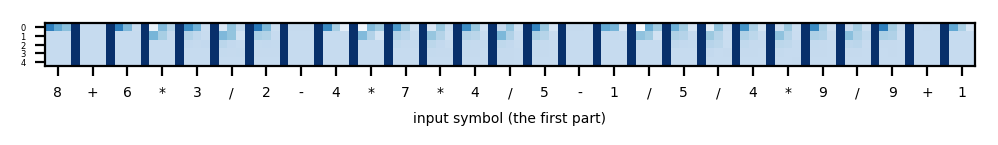

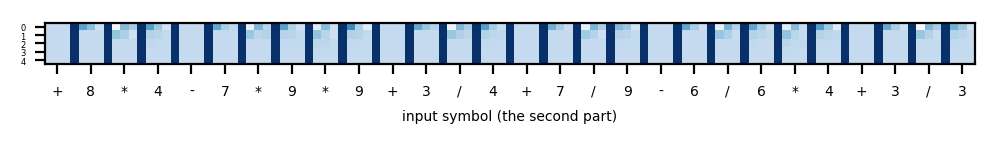

In [181]:
ncols = mem_whole.shape[1]
mid = seq_len // 2 * (remain + 1)
fig, ax = plt.subplots()
fig.dpi = 200
plt.imshow(mem_whole[:, :mid-1], cmap=plt.cm.Blues, vmax=0.7)
plt.xticks(np.arange(1, mem_whole.shape[1], 4)[:seq_len//2], list(seq)[:seq_len//2], fontsize=5)
plt.yticks(np.arange(5), fontsize=3)
plt.xlabel('input symbol (the first part)', fontsize=5)
plt.ylabel('')
plt.show()

fig, ax = plt.subplots()
fig.dpi = 200
plt.imshow(mem_whole[:, mid:-1], cmap=plt.cm.Blues, vmax=0.7)
plt.xticks(np.arange(1, mem_whole.shape[1], 4)[:seq_len-seq_len//2], list(seq)[seq_len//2:], fontsize=5)
plt.yticks(np.arange(5), fontsize=3)
plt.xlabel('input symbol (the second part)', fontsize=5)
plt.show()

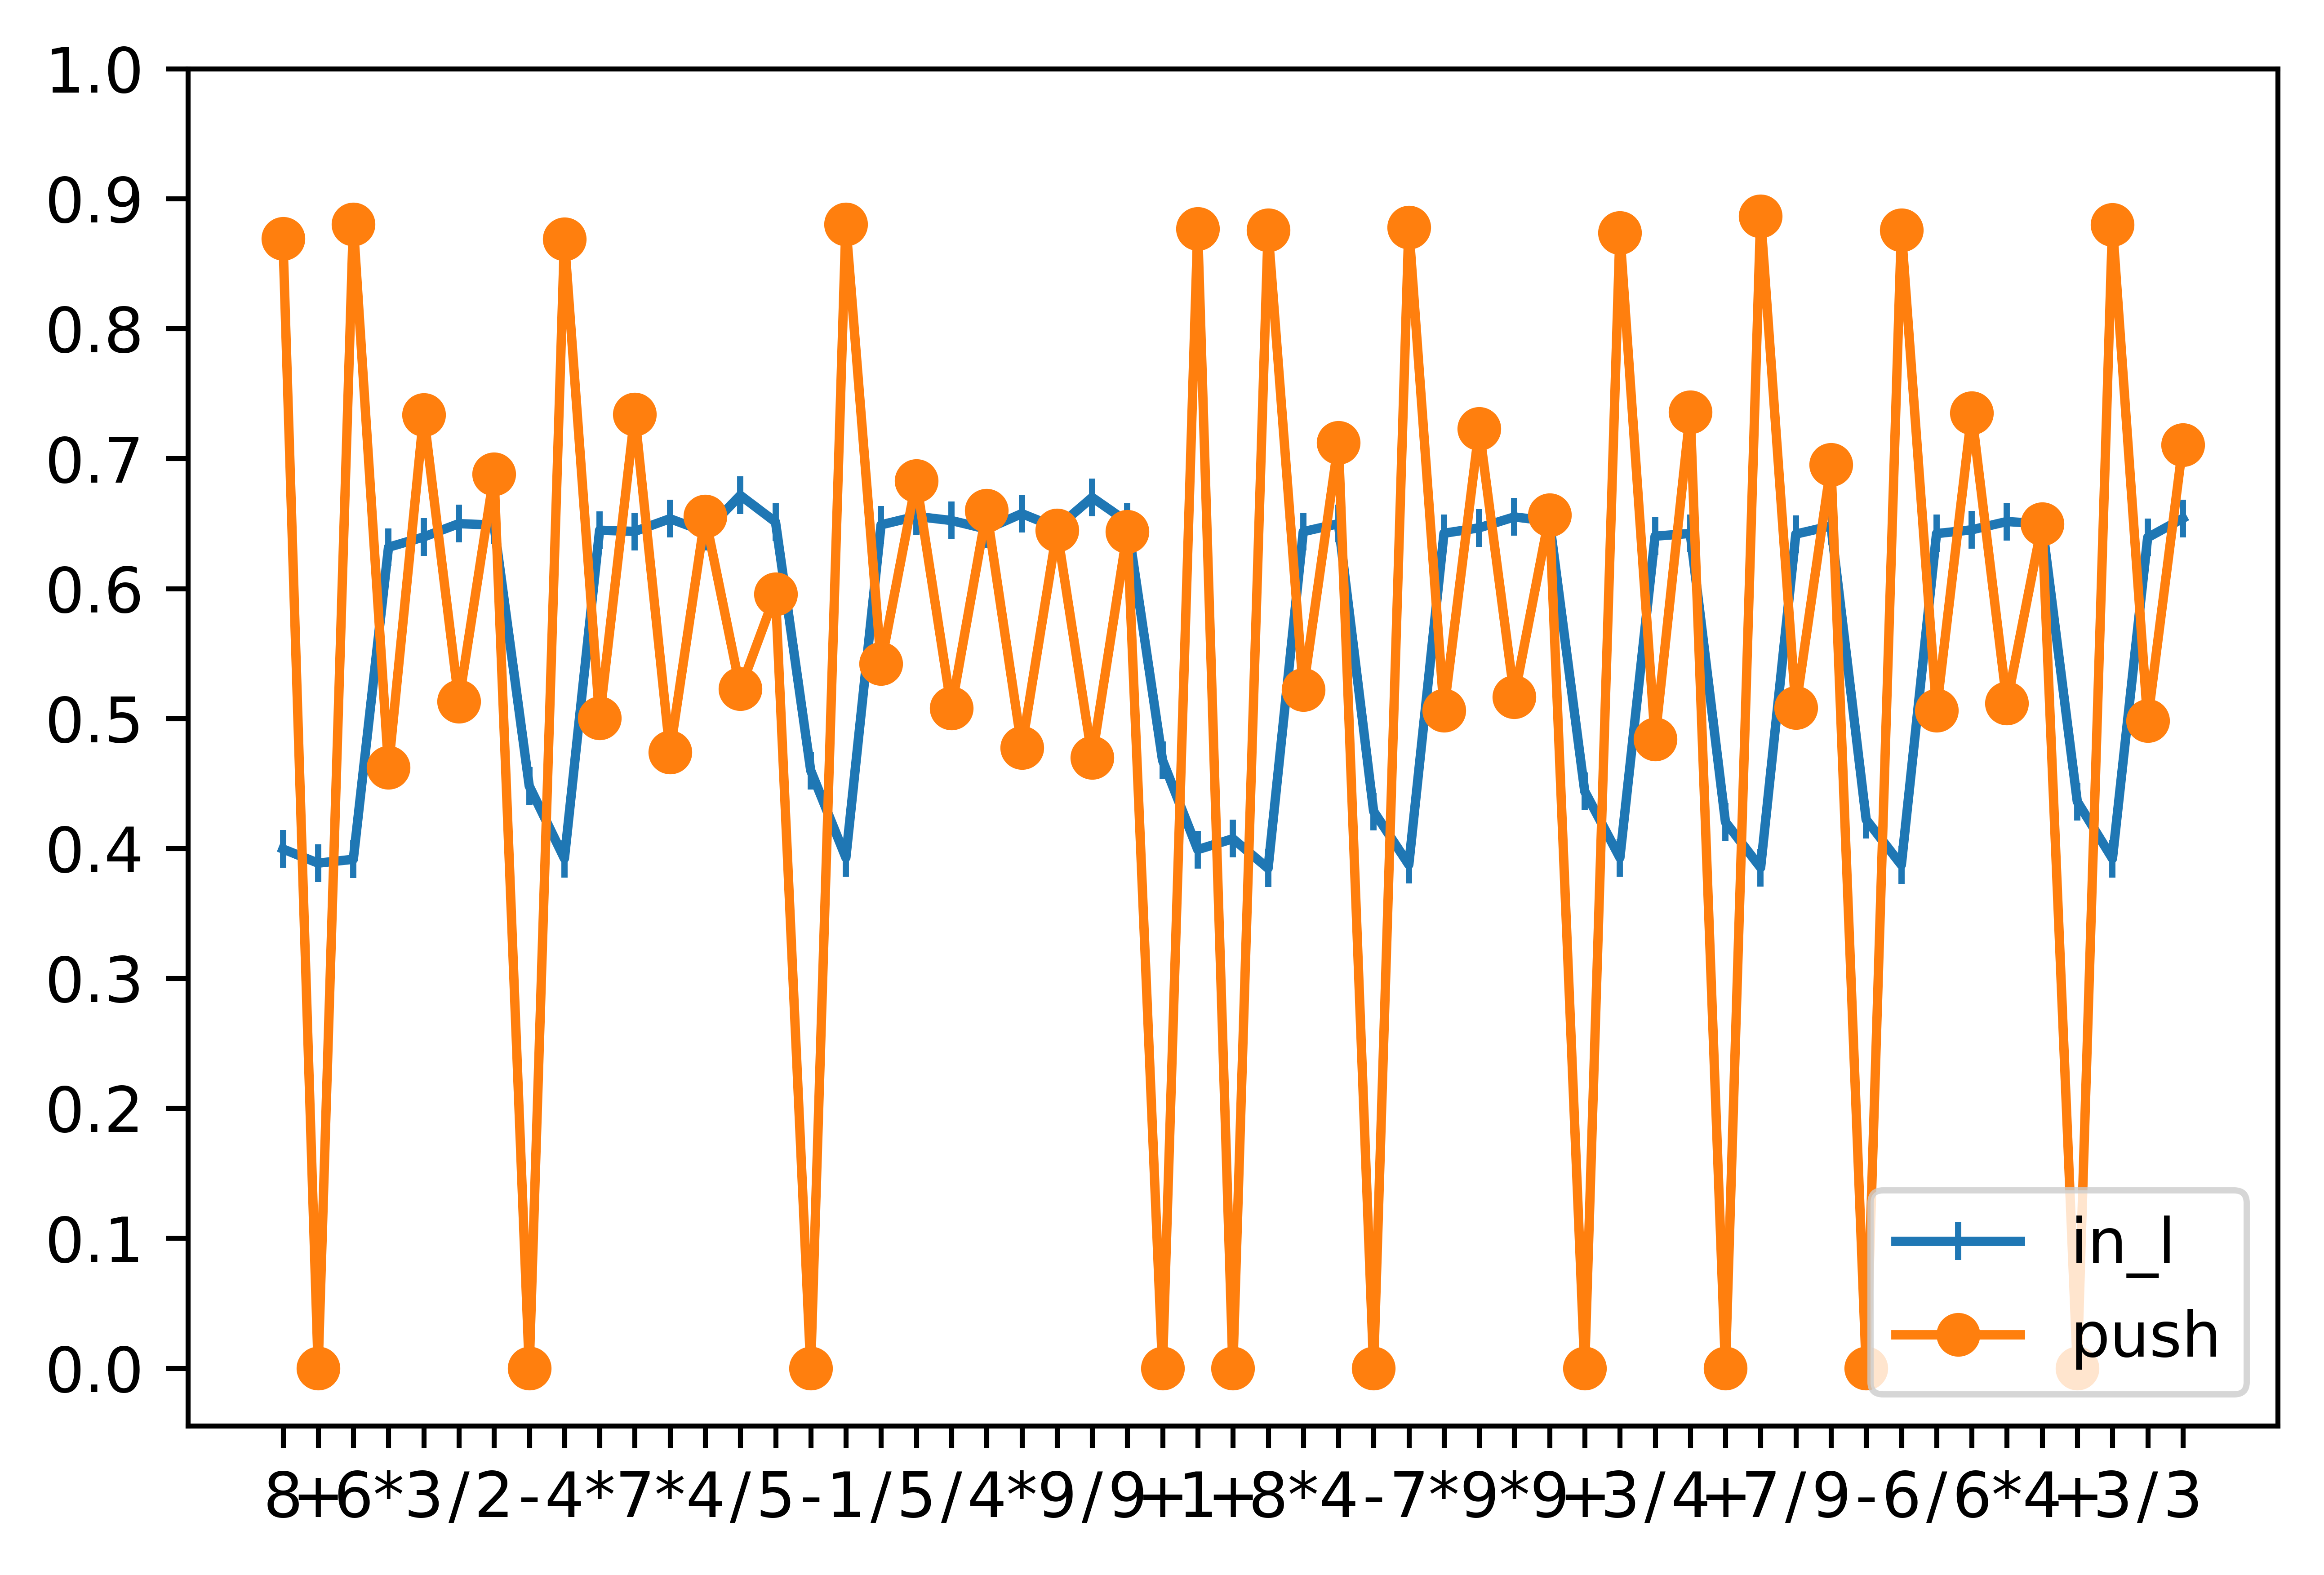

In [85]:
fig, ax = plt.subplots()
fig.dpi = 1000
plt.plot(np.arange(seq_len), 
         np.array([in_l[i] for i in in_l.keys()])/ngates,
        label='in_l', marker='|')
# plt.plot(np.arange(seq_len), 
#          np.array([in_r[i] for i in in_r.keys()])/ngates,
#         label='in_r')
# plt.plot(np.arange(seq_len), 
#          np.array([forget_l[i] for i in forget_l.keys()])/ngates,
#         label='forget_l',marker='x')
# plt.plot(np.arange(seq_len), 
#          np.array([forget_r[i] for i in forget_r.keys()])/ngates,
#         label='forget_r')
plt.plot(np.arange(seq_len), 
         push,
        label='push',marker='o')

plt.legend()
plt.xticks(np.arange(0, seq_len, 1), list(seq))
plt.yticks(np.arange(0, 1.1, 0.1))
plt.show()

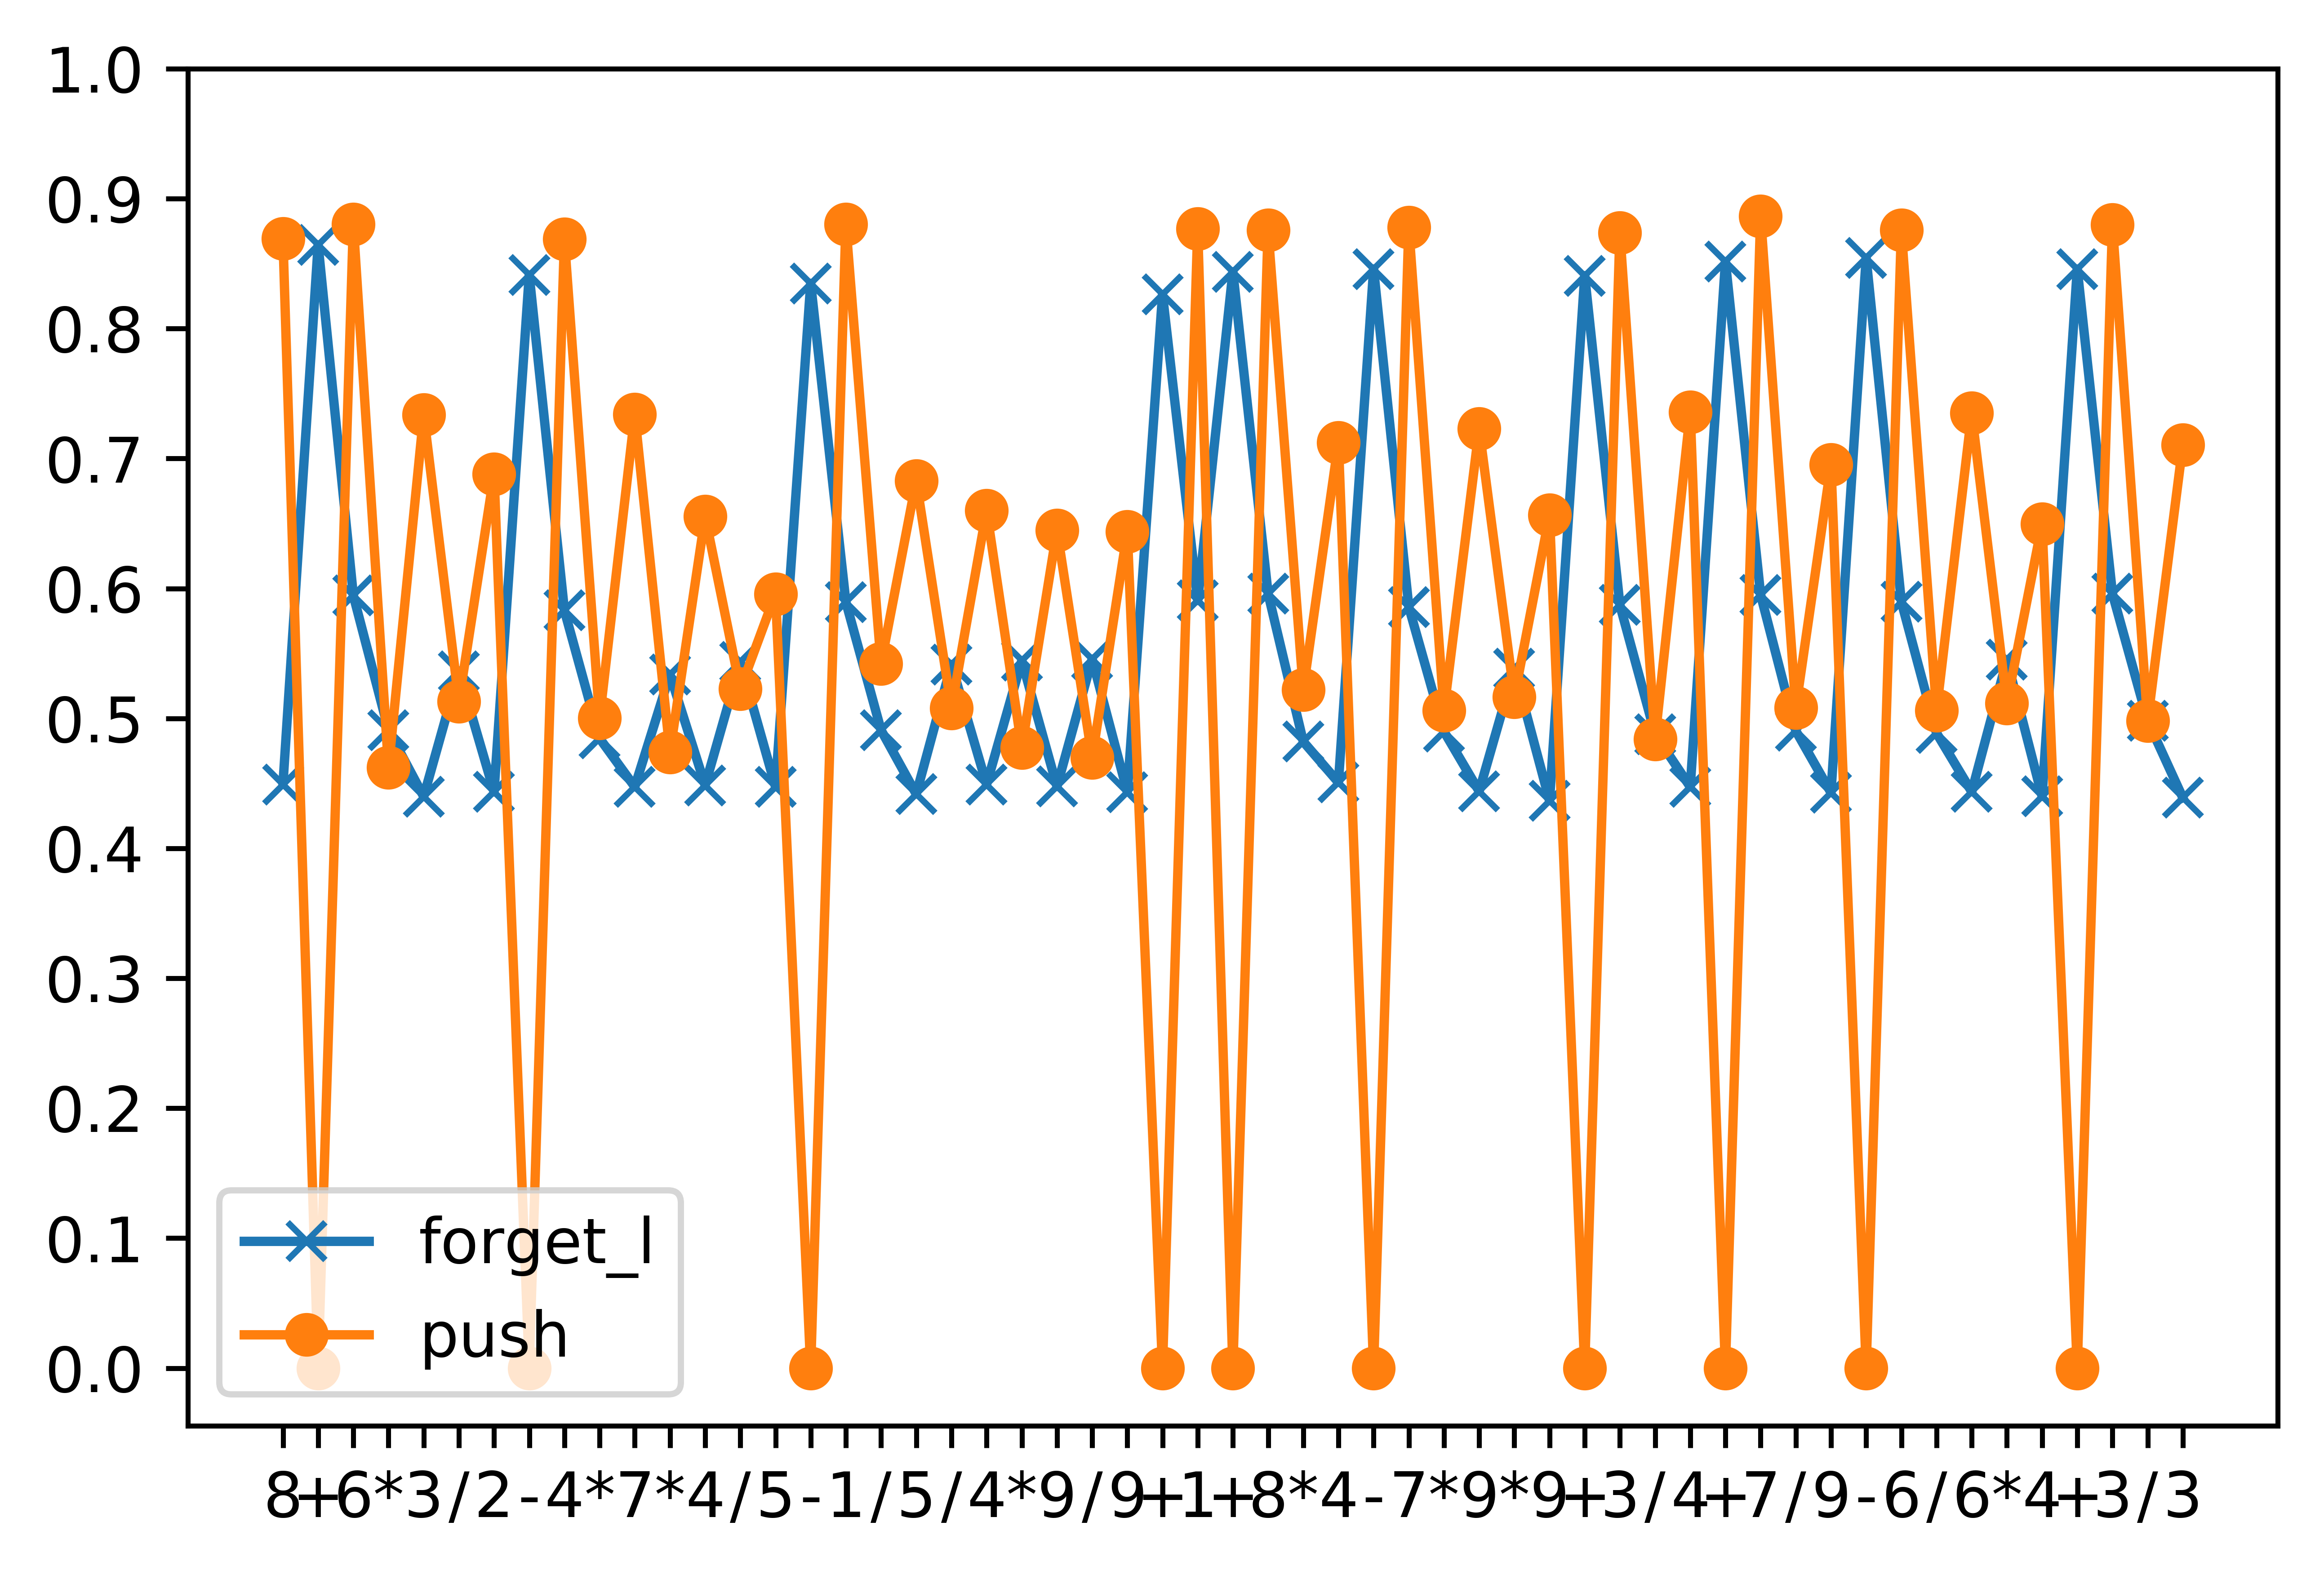

In [86]:
fig, ax = plt.subplots()
fig.dpi = 1000
# plt.plot(np.arange(seq_len), 
#          np.array([in_l[i] for i in in_l.keys()])/ngates,
#         label='in_l', marker='|')
# plt.plot(np.arange(seq_len), 
#          np.array([in_r[i] for i in in_r.keys()])/ngates,
#         label='in_r')
plt.plot(np.arange(seq_len), 
         np.array([forget_l[i] for i in forget_l.keys()])/ngates,
        label='forget_l',marker='x')
# plt.plot(np.arange(seq_len), 
#          np.array([forget_r[i] for i in forget_r.keys()])/ngates,
#         label='forget_r')
plt.plot(np.arange(seq_len), 
         push,
        label='push',marker='o')

plt.legend()
plt.xticks(np.arange(0, seq_len, 1), list(seq))
plt.yticks(np.arange(0, 1.1, 0.1))
plt.show()

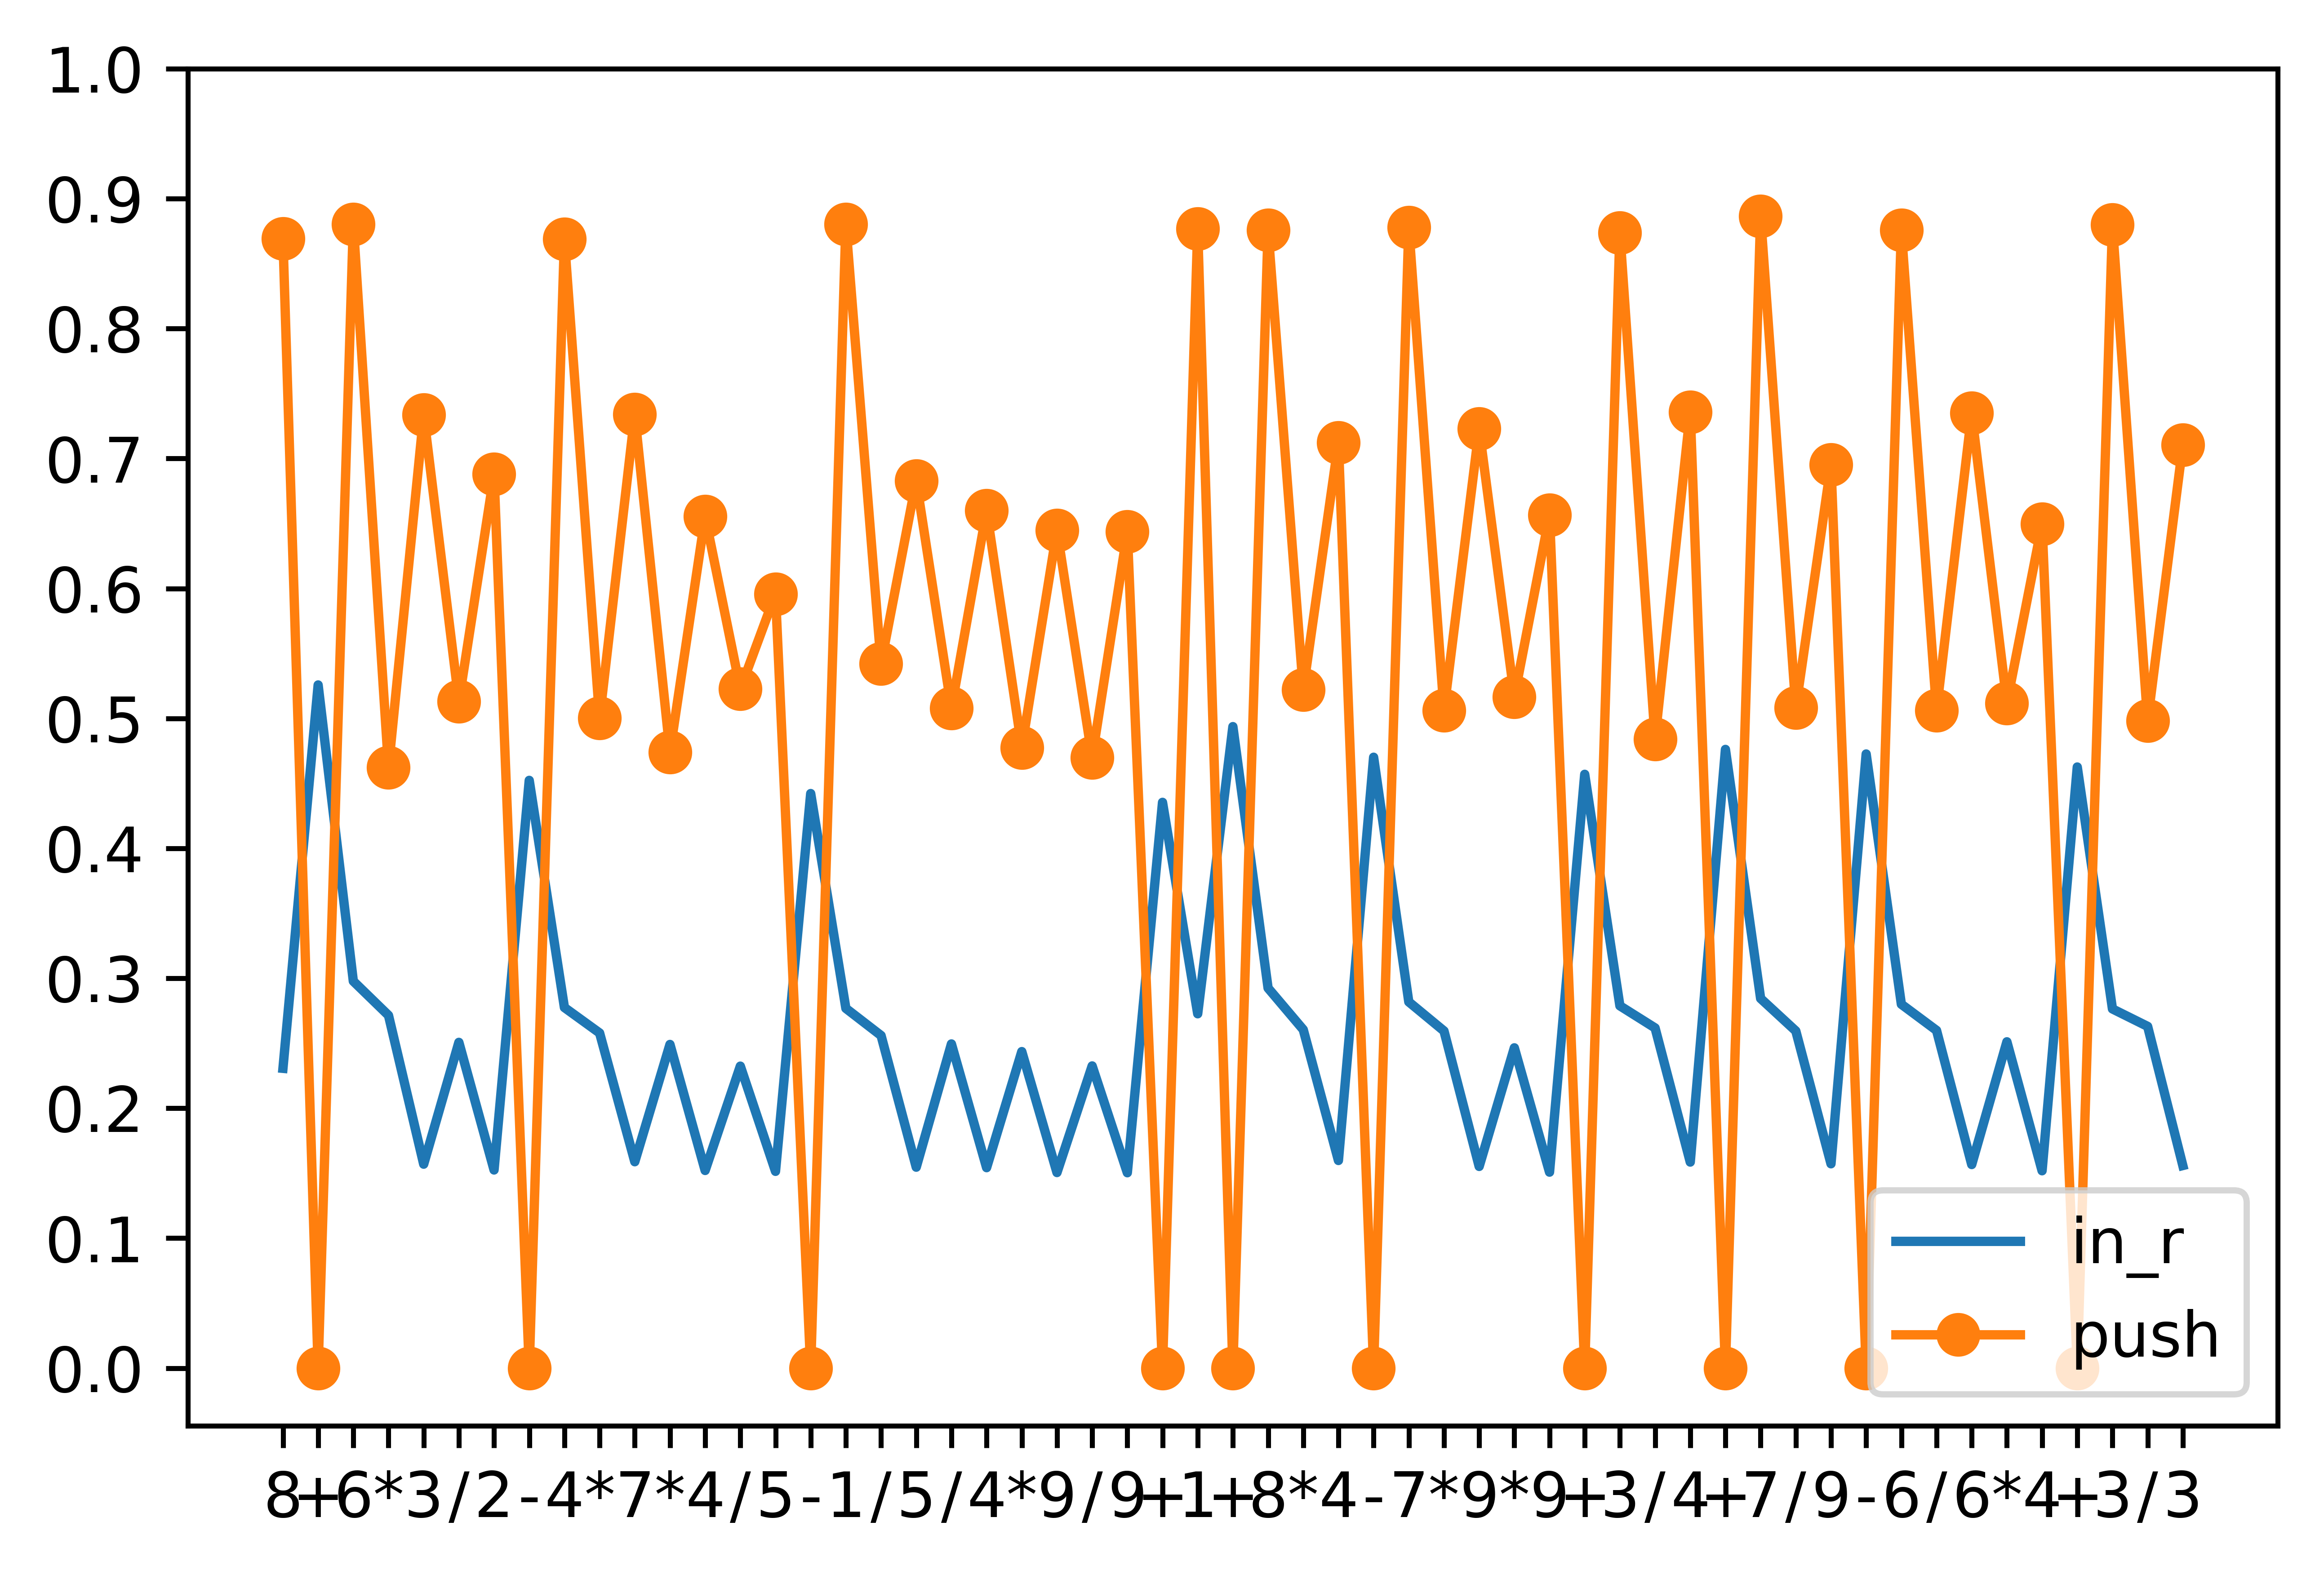

In [87]:
fig, ax = plt.subplots()
fig.dpi = 1000
# plt.plot(np.arange(seq_len), 
#          np.array([in_l[i] for i in in_l.keys()])/ngates,
#         label='in_l', marker='|')
plt.plot(np.arange(seq_len), 
         np.array([in_r[i] for i in in_r.keys()])/ngates,
        label='in_r')
# plt.plot(np.arange(seq_len), 
#          np.array([forget_l[i] for i in forget_l.keys()])/ngates,
#         label='forget_l',marker='x')
# plt.plot(np.arange(seq_len), 
#          np.array([forget_r[i] for i in forget_r.keys()])/ngates,
#         label='forget_r')
plt.plot(np.arange(seq_len), 
         push,
        label='push',marker='o')

plt.legend()
plt.xticks(np.arange(0, seq_len, 1), list(seq))
plt.yticks(np.arange(0, 1.1, 0.1))
plt.show()

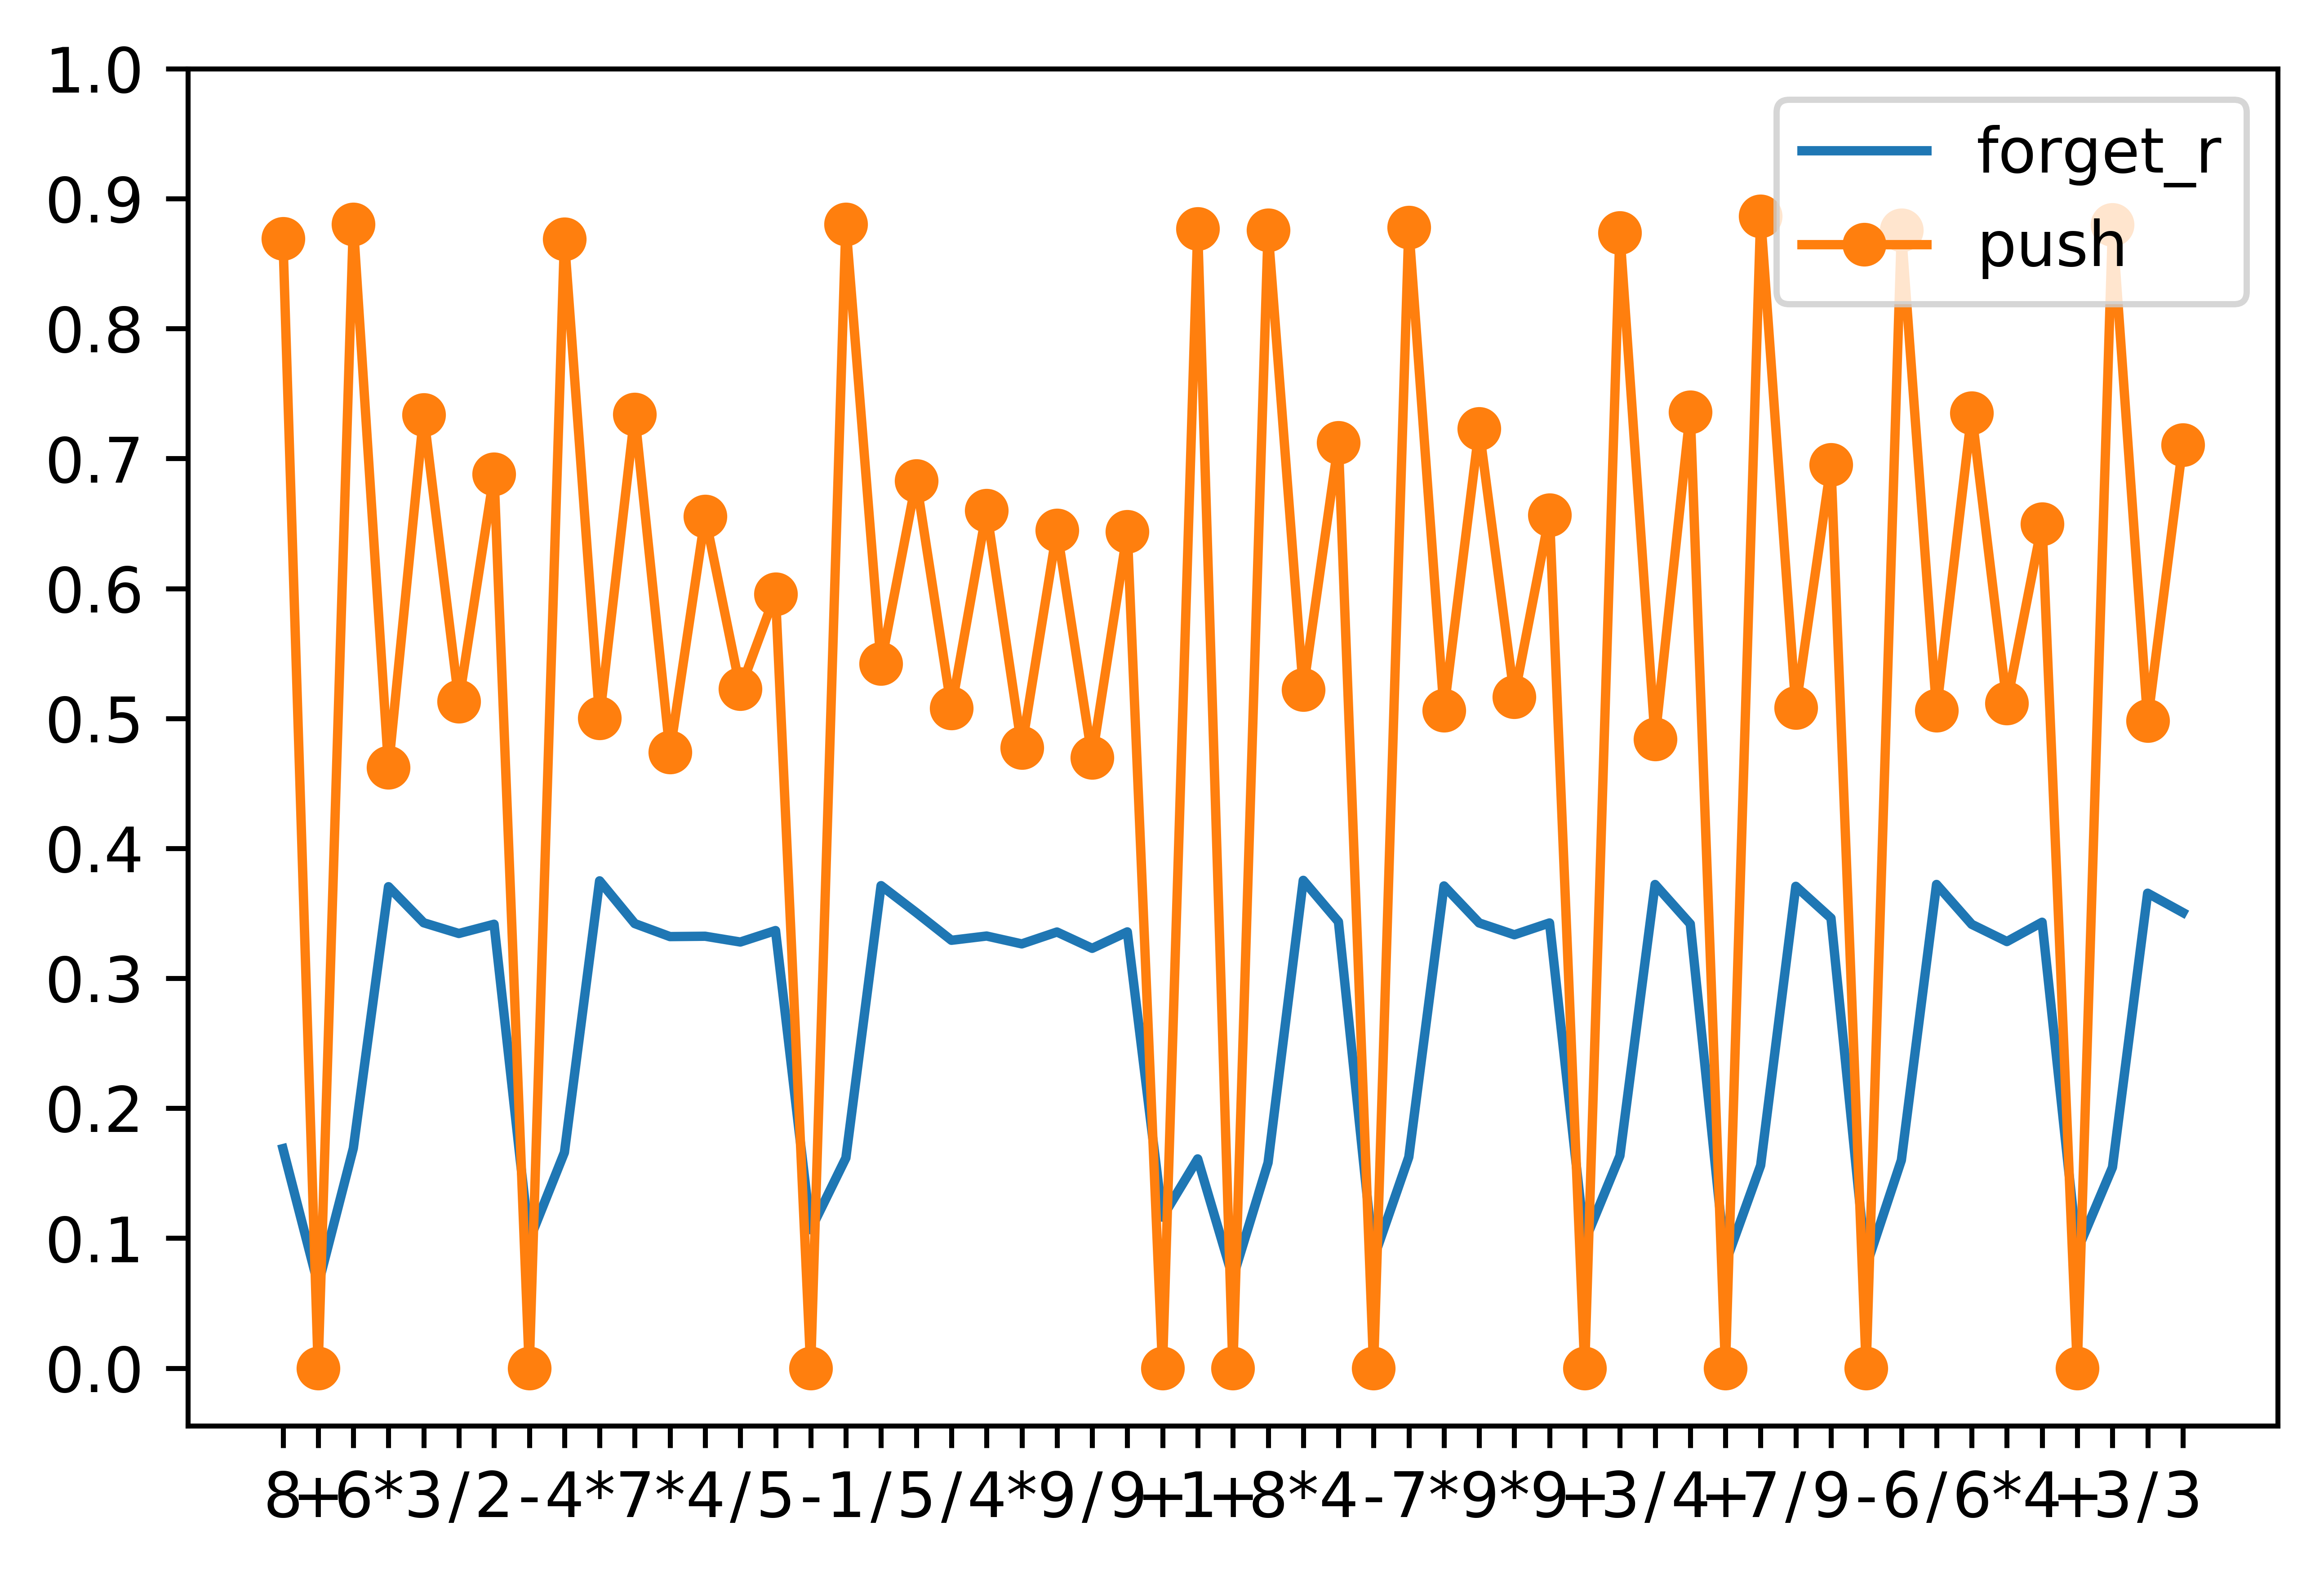

In [88]:
fig, ax = plt.subplots()
fig.dpi = 1000
# plt.plot(np.arange(seq_len), 
#          np.array([in_l[i] for i in in_l.keys()])/ngates,
#         label='in_l', marker='|')
# plt.plot(np.arange(seq_len), 
#          np.array([in_r[i] for i in in_r.keys()])/ngates,
#         label='in_r')
# plt.plot(np.arange(seq_len), 
#          np.array([forget_l[i] for i in forget_l.keys()])/ngates,
#         label='forget_l',marker='x')
plt.plot(np.arange(seq_len), 
         np.array([forget_r[i] for i in forget_r.keys()])/ngates,
        label='forget_r')
plt.plot(np.arange(seq_len), 
         push,
        label='push',marker='o')

plt.legend()
plt.xticks(np.arange(0, seq_len, 1), list(seq))
plt.yticks(np.arange(0, 1.1, 0.1))
plt.show()

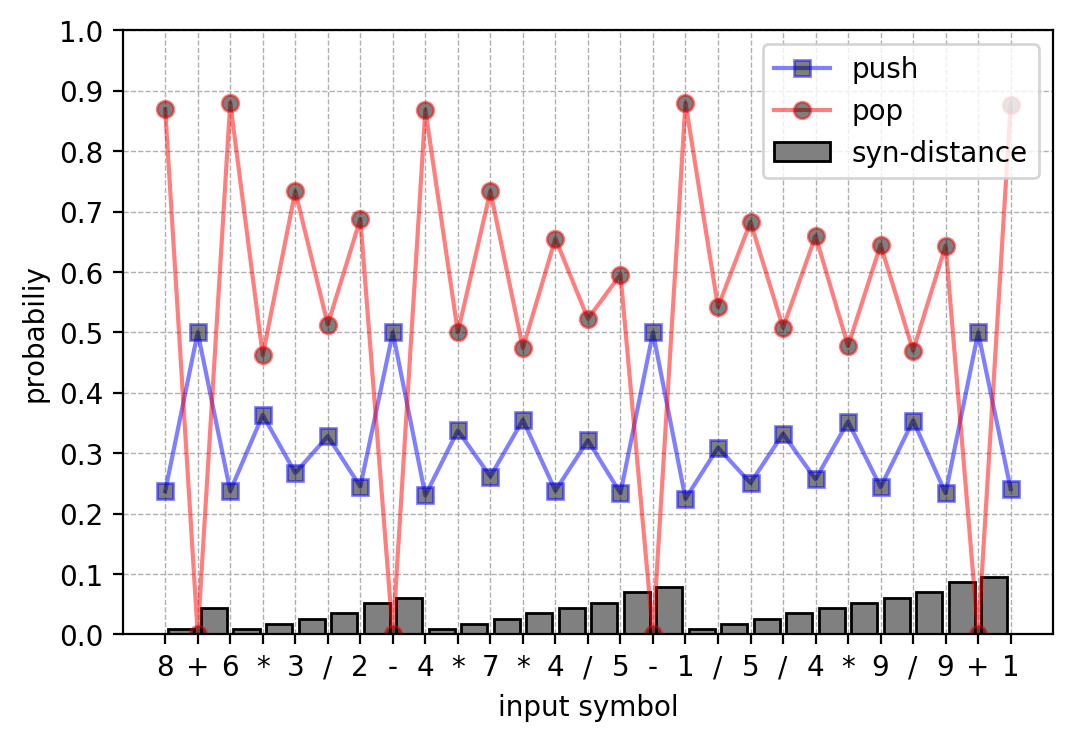

In [31]:
kept = 27
fig, ax = plt.subplots()
fig.dpi = 200
plt.grid(axis='both', linestyle='dashed', linewidth=0.5)
plt.plot(np.arange(seq_len)[:kept], 
         pop_normalized[:kept],
        label='pop', marker='s',color='blue', alpha=0.5, fillstyle='none')
plt.plot(np.arange(seq_len)[:kept], 
         push[:kept],
        label='push', marker='o', color='red', alpha=0.5, fillstyle='none')

plt.bar(np.arange(0.5, seq_len-0.5)[:kept-1], (np.array(syn_dis)/max(syn_dis) * 0.2)[:kept-1],
        label='syn-distance', color='gray', edgecolor='black')

plt.ylabel('probabiliy')
plt.xlabel('input symbol')

plt.legend()
plt.xticks(np.arange(0, seq_len, 1)[:kept], list(seq)[:kept], fontsize=10)
plt.yticks(np.arange(0, 1.1, 0.1), fontsize=10)
plt.show()

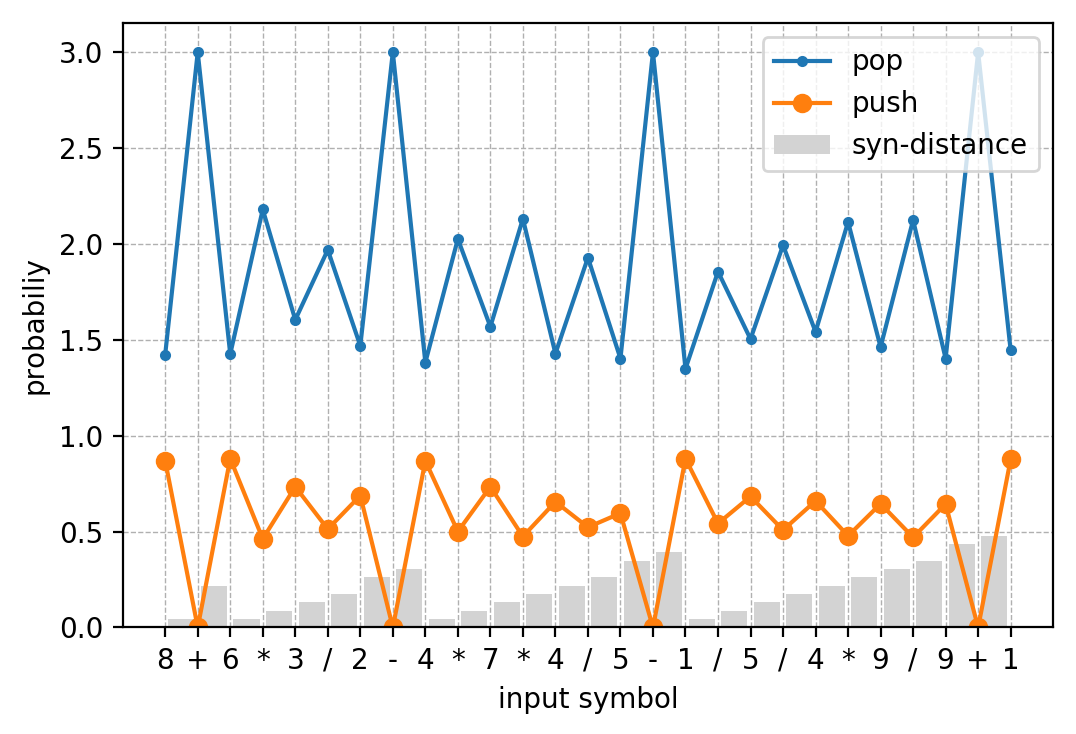

In [25]:
npop = []
for t in range(seq_len):
    pop = (mean_dist[t][:6] * np.arange(6)).sum() + \
        (mean_dist[t][6:] * np.arange(6)).sum()
    npop.append(pop)    

kept = 27
fig, ax = plt.subplots()
fig.dpi = 200
plt.grid(axis='both', linestyle='dashed', linewidth=0.5)
plt.plot(np.arange(seq_len)[:kept], 
         npop[:kept],
        label='pop',marker='.')
plt.plot(np.arange(seq_len)[:kept], 
         push[:kept],
        label='push',marker='o')

plt.bar(np.arange(0.5, seq_len-0.5)[:kept-1], (np.array(syn_dis)/max(syn_dis))[:kept-1],
        label='syn-distance', color='lightgray')

plt.ylabel('probabiliy')
plt.xlabel('input symbol')

plt.legend()
plt.xticks(np.arange(0, seq_len, 1)[:kept], list(seq)[:kept], fontsize=10)
# plt.yticks(np.arange(0, 1.1, 0.1), fontsize=10)
plt.show()

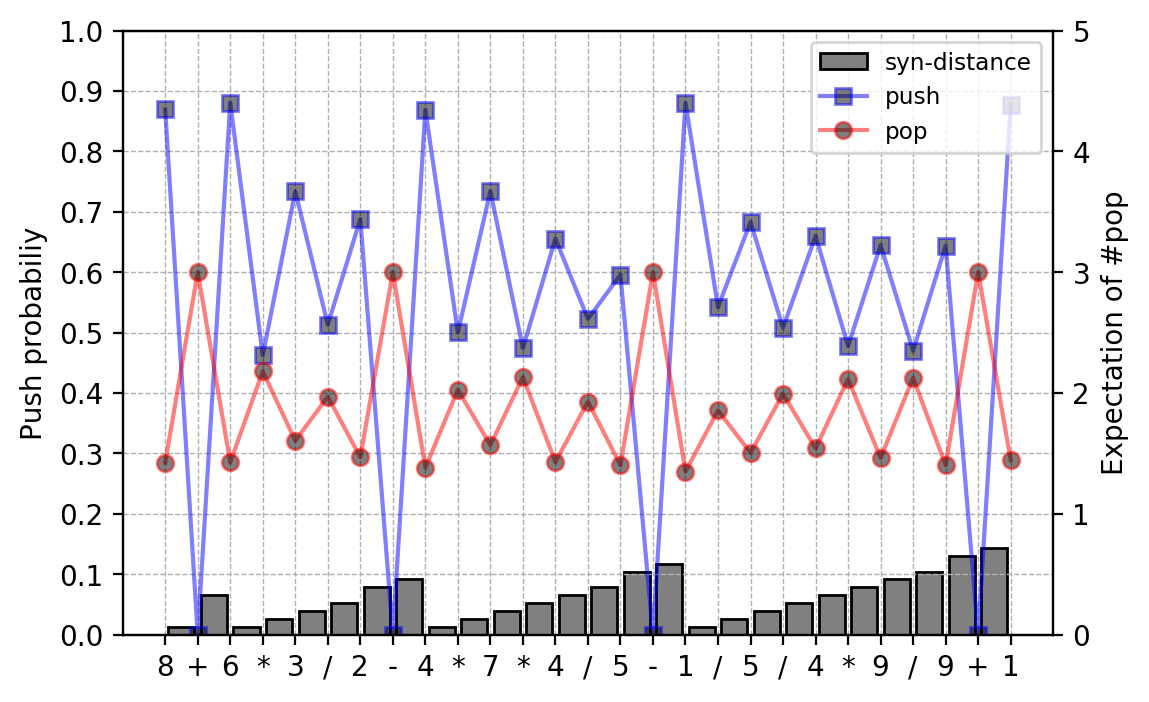

In [24]:
kept = 27
fig, ax = plt.subplots()
fig.dpi = 200
plt.grid(axis='both', linestyle='dashed', linewidth=0.5)
lns0 = ax.bar(np.arange(0.5, seq_len-0.5)[:kept-1], (np.array(syn_dis)/max(syn_dis))[:kept-1]*0.3,
        label='syn-distance', color='gray', edgecolor='black')

lns1 = ax.plot(np.arange(seq_len)[:kept], 
         push[:kept],
        label='push', marker='s',color='blue', alpha=0.5, fillstyle='none')
ax.set_ylabel('Push probabiliy')
ax.set_yticks(np.arange(0, 1+0.1, 0.1))

ax_r = ax.twinx()
lns2 = ax_r.plot(np.arange(seq_len)[:kept], 
         npop[:kept],
        label='pop', marker='o', color='red', alpha=0.5, fillstyle='none')
ax_r.set_ylabel('Expectation of #pop')
ax_r.set_yticks(np.arange(0, 5+1, 1))

lns = [lns0] + lns1 + lns2
labs = [l.get_label() for l in lns]
plt.legend(lns, labs, loc=0, fontsize='small')

plt.xlabel('input symbol')

#     plt.legend()
plt.xticks(np.arange(0, seq_len, 1)[:kept], list(seq)[:kept], fontsize=10)
# plt.yticks(np.arange(0, 1.1, 0.1), fontsize=10)
plt.show()

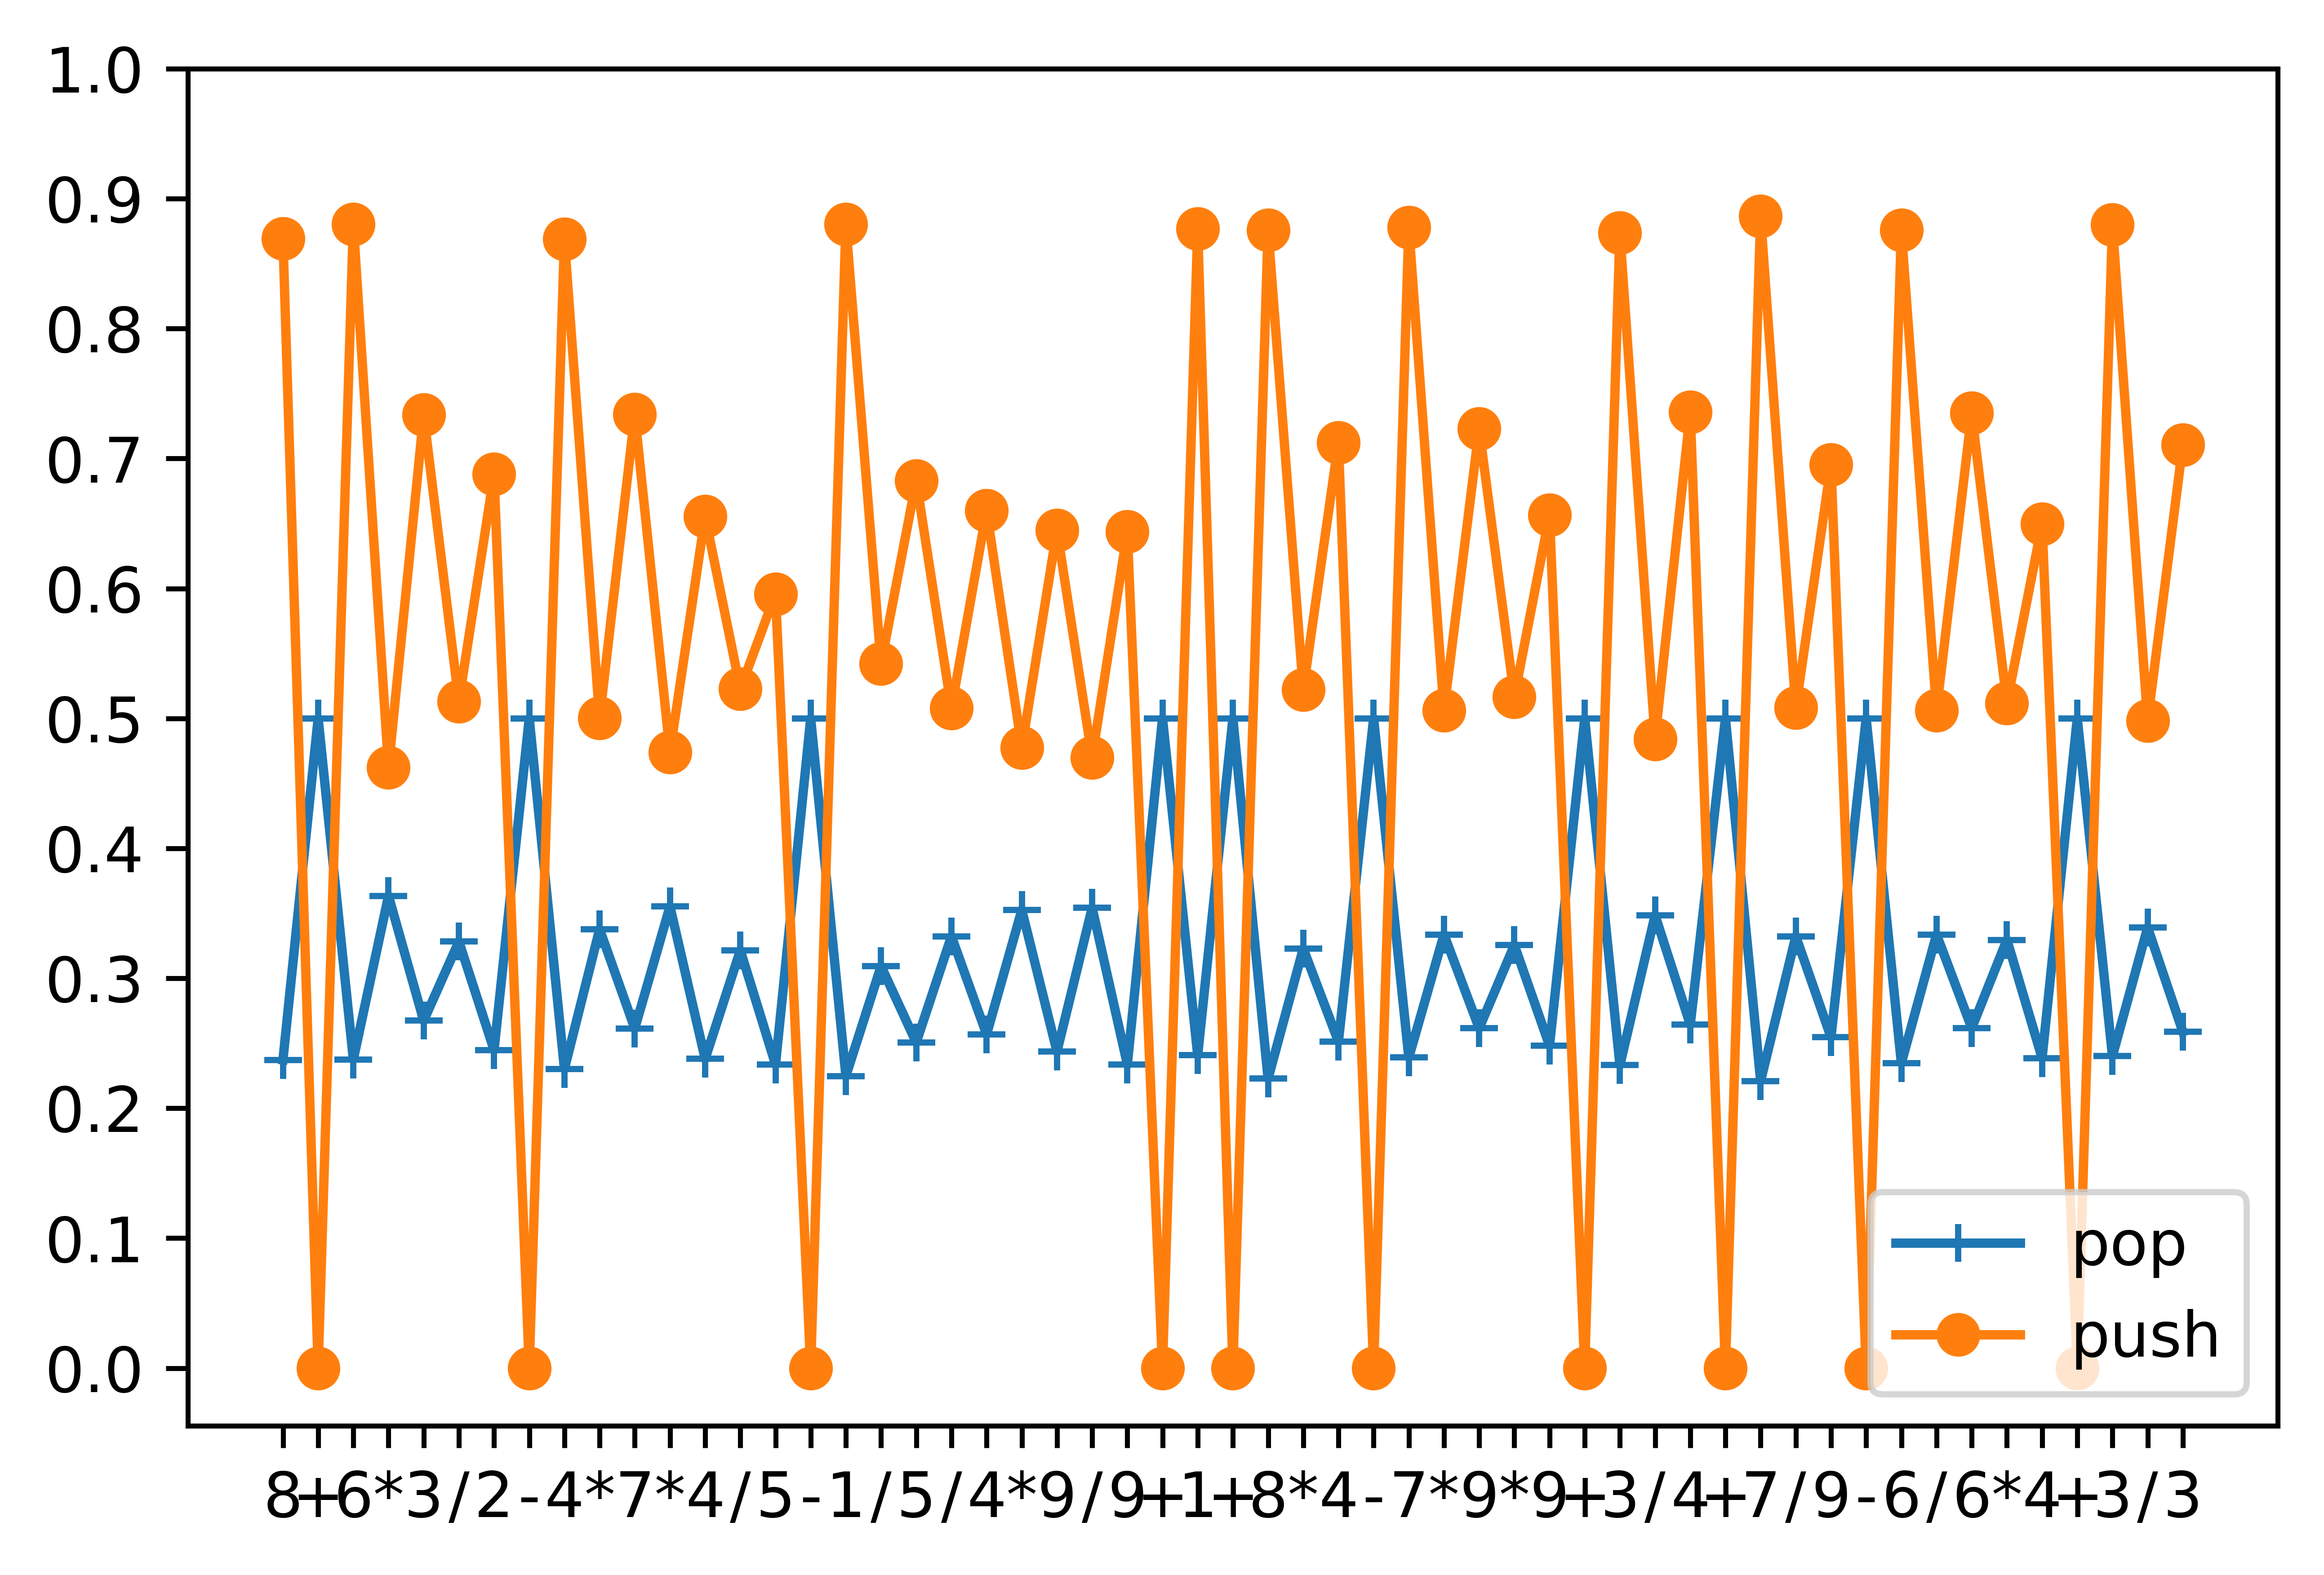

In [109]:
fig, ax = plt.subplots()
fig.dpi = 1000
# plt.plot(np.arange(seq_len), 
#          np.array([in_l[i] for i in in_l.keys()])/ngates,
#         label='in_l', marker='|')
# plt.plot(np.arange(seq_len), 
#          np.array([in_r[i] for i in in_r.keys()])/ngates,
#         label='in_r')
# plt.plot(np.arange(seq_len), 
#          np.array([forget_l[i] for i in forget_l.keys()])/ngates,
#         label='forget_l',marker='x')
plt.plot(np.arange(seq_len), 
         pop_normalized,
        label='pop',marker='+')
plt.plot(np.arange(seq_len), 
         push,
        label='push',marker='o')

plt.legend()
plt.xticks(np.arange(0, seq_len, 1), list(seq))
plt.yticks(np.arange(0, 1.1, 0.1))
plt.show()

In [35]:
npop

[1.423365640952162,
 3.000000000033365,
 1.4251496887416566,
 2.1800282846452372,
 1.6042544876308558,
 1.969335488082383,
 1.4685484008138188,
 2.99999999529671,
 1.3816857916778846,
 2.0260428914476325,
 1.5682367665688397,
 2.1313838966639236,
 1.4280183601192746,
 1.928678452436927,
 1.40208065425857,
 2.9999999772977075,
 1.3487625036548485,
 1.8558656991090663,
 1.5039155419758536,
 1.993645383638621,
 1.5412616831545072,
 2.1149263162953558,
 1.46206412108743,
 2.1249901668602207,
 1.4022352085460172,
 2.999999982895134,
 1.4446198344566863,
 3.0000000000332836,
 1.3368524140594524,
 1.9369092448681793,
 1.5076395946516121,
 2.9999999950913803,
 1.434368568463401,
 2.001747139836418,
 1.569483742968132,
 1.9531056411580427,
 1.4890391373020113,
 2.999999994787504,
 1.399364992571086,
 2.0908772499637744,
 1.5858556236324661,
 2.99999999663537,
 1.325823955861217,
 1.9936440017503405,
 1.5280100719317777,
 2.999999998416469,
 1.4084206379599147,
 2.0017394143885854,
 1.5700360097